# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
!unzip -j TP3-4.zip

--2021-11-30 19:11:00--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13421167 (13M) [application/zip]
Saving to: ‘TP3-4.zip’

TP3-4.zip           100%[===================>]  12.80M  13.1MB/s    in 1.0s    

2021-11-30 19:11:02 (13.1 MB/s) - ‘TP3-4.zip’ saved [13421167/13421167]

Archive:  TP3-4.zip
  inflating: tme5.py                 
  inflating: mnist.mat               
  inflating: circles.py              
  inflating: circles.mat             


In [2]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'tme5.py'

# Part 1 : Forward and backward passes "by hands"

In [3]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    
    params["Wh"] = torch.randn(nh,nx)*0.3
    params["Wy"] = torch.randn(ny, nh)*0.3
    params["bh"] = torch.zeros(nh,1)*0.3
    params["by"] = torch.zeros(ny,1)*0.3
    
    ####################
    ##      END        #
    ####################
    return params

In [4]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat
    
    outputs["X"] = X
    outputs["htilde"] = X@params["Wh"].t()+params['bh'].t()
    outputs["h"] = torch.tanh(outputs['htilde'])
    outputs["ytilde"] = outputs['h']@params["Wy"].t()+params['by'].t()
    outputs["yhat"] = torch.exp(outputs['ytilde'])/torch.sum(torch.exp(outputs['ytilde']),axis=1).view(-1,1)
    
    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [5]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    L = -torch.mean(torch.sum(Y*torch.log(Yhat),axis=1))
    _, indsYhat = torch.max(Yhat,1)
    _, indsY = torch.max(Y,1)
    acc = torch.mean(torch.where(indsYhat==indsY,1.0,0.0))

    ####################
    ##      END        #
    ####################

    return L, acc.item()

In [6]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    gradL = outputs['yhat']-Y

    grads["Wy"] = gradL.t()@outputs['h']
    grads["by"] = gradL.sum(axis=0, keepdim=True).t()
    delta=torch.mm(gradL, params['Wy'])*(1-torch.pow(outputs['h'],2))
    grads["Wh"] = torch.mm(delta.t(),outputs['X'])
    grads["bh"] = delta.sum(0, keepdim=True).t()

    grads['Wy'] /= bsize
    grads['by'] /= bsize
    grads['Wh'] /= bsize
    grads['bh'] /= bsize
    
    ####################
    ##      END        #
    ####################
    return grads

In [7]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] = params["Wh"]-eta*grads['Wh']
    params["Wy"] = params["Wy"]-eta*grads['Wy']
    params["bh"] = params["bh"]-eta*grads['bh']
    params["by"] = params["by"]-eta*grads['by']    

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

In [8]:
# _, indsYhat = torch.max(Yhat_train,1)
# _, indsY = torch.max(data.Ytrain,1)
# torch.mean(torch.where(indsYhat==indsY,1.0,0.0)).item()

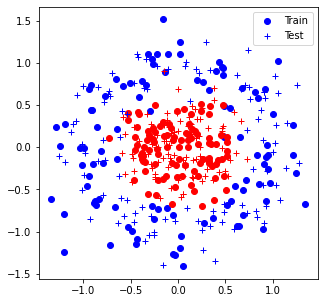

Iter 0: Acc train 0.5% (0.70), acc test 0.5% (0.69)


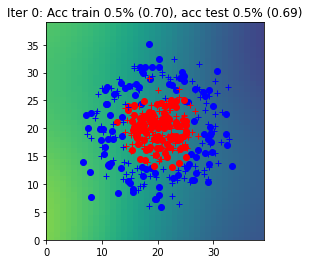

Iter 1: Acc train 0.5% (0.70), acc test 0.5% (0.69)


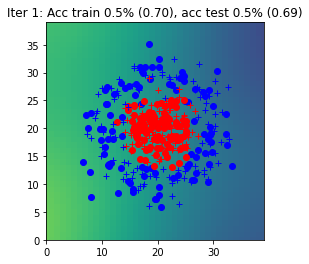

Iter 2: Acc train 0.5% (0.70), acc test 0.5% (0.69)


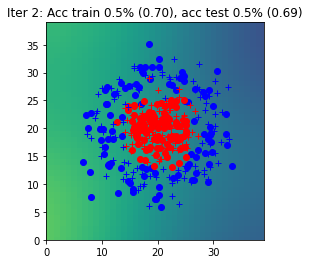

Iter 3: Acc train 0.5% (0.69), acc test 0.6% (0.69)


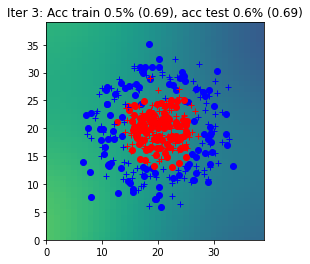

Iter 4: Acc train 0.6% (0.69), acc test 0.6% (0.69)


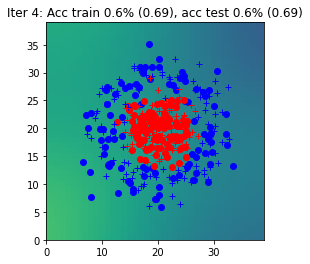

Iter 5: Acc train 0.6% (0.69), acc test 0.6% (0.69)


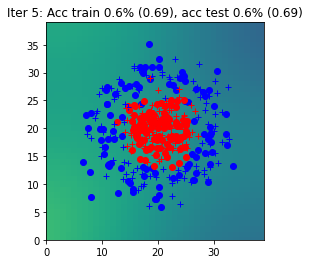

Iter 6: Acc train 0.6% (0.69), acc test 0.6% (0.69)


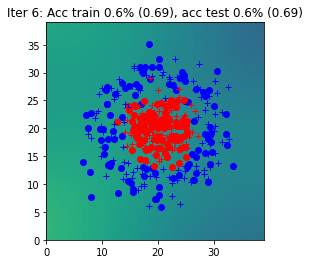

Iter 7: Acc train 0.7% (0.69), acc test 0.6% (0.69)


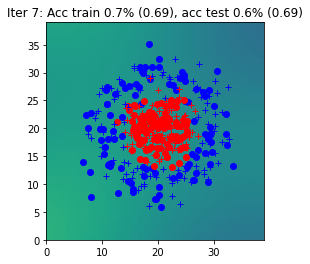

Iter 8: Acc train 0.7% (0.69), acc test 0.7% (0.69)


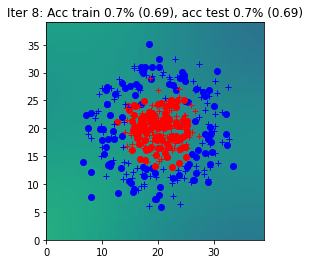

Iter 9: Acc train 0.6% (0.69), acc test 0.6% (0.69)


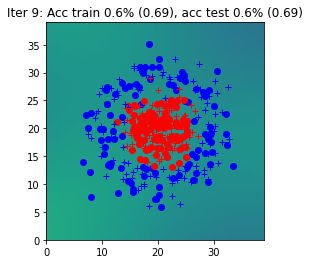

Iter 10: Acc train 0.6% (0.69), acc test 0.6% (0.69)


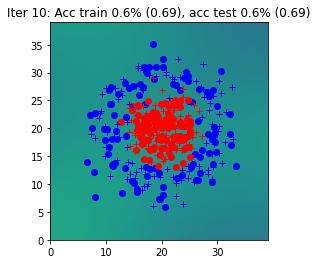

Iter 11: Acc train 0.6% (0.69), acc test 0.6% (0.69)


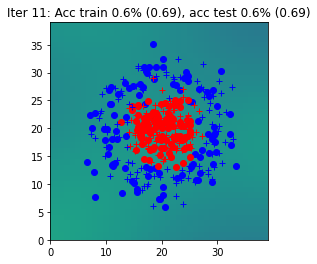

Iter 12: Acc train 0.6% (0.69), acc test 0.6% (0.69)


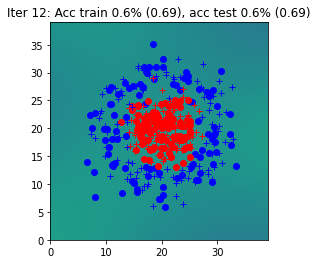

Iter 13: Acc train 0.7% (0.69), acc test 0.7% (0.69)


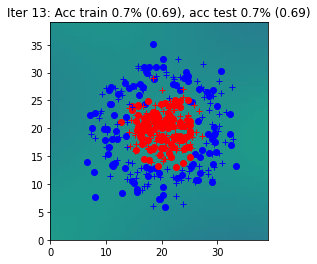

Iter 14: Acc train 0.7% (0.69), acc test 0.7% (0.69)


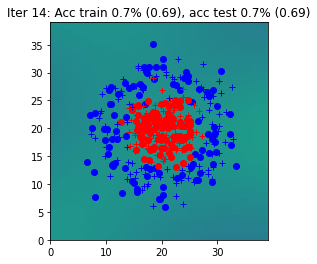

Iter 15: Acc train 0.7% (0.69), acc test 0.7% (0.69)


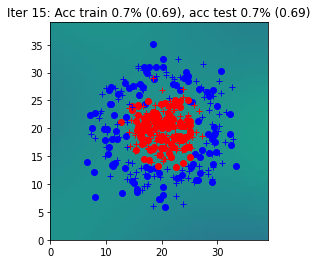

Iter 16: Acc train 0.7% (0.69), acc test 0.7% (0.69)


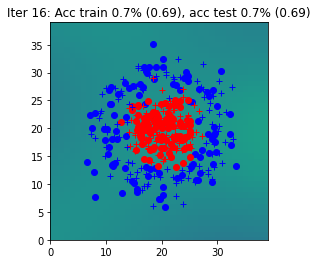

Iter 17: Acc train 0.8% (0.69), acc test 0.7% (0.69)


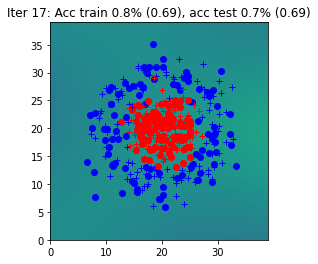

Iter 18: Acc train 0.8% (0.69), acc test 0.8% (0.69)


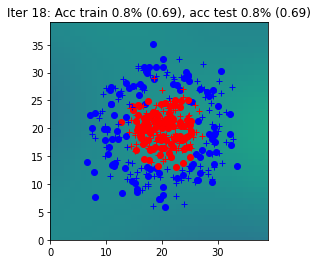

Iter 19: Acc train 0.7% (0.69), acc test 0.7% (0.69)


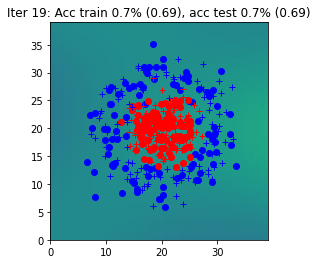

Iter 20: Acc train 0.7% (0.69), acc test 0.7% (0.69)


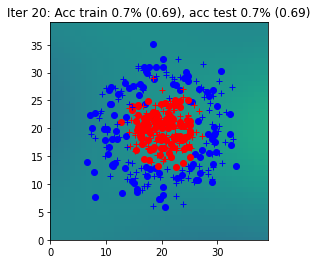

Iter 21: Acc train 0.7% (0.69), acc test 0.7% (0.69)


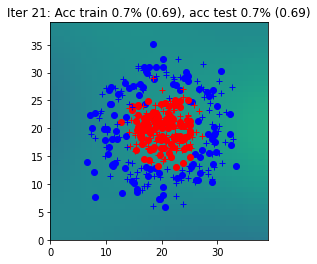

Iter 22: Acc train 0.7% (0.69), acc test 0.7% (0.69)


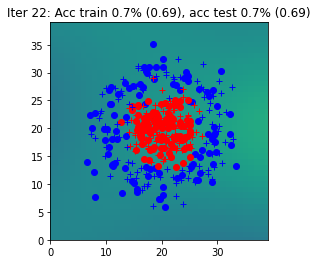

Iter 23: Acc train 0.8% (0.69), acc test 0.7% (0.69)


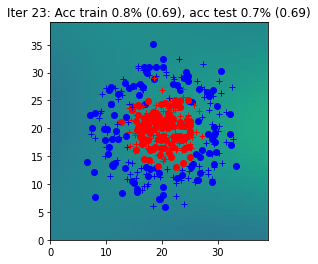

Iter 24: Acc train 0.7% (0.69), acc test 0.7% (0.69)


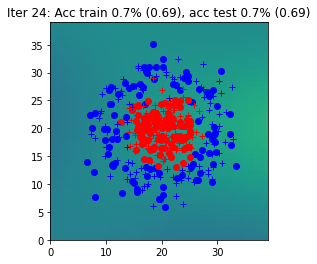

Iter 25: Acc train 0.7% (0.69), acc test 0.7% (0.69)


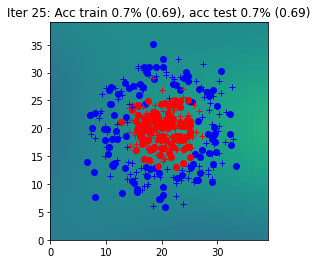

Iter 26: Acc train 0.7% (0.69), acc test 0.7% (0.69)


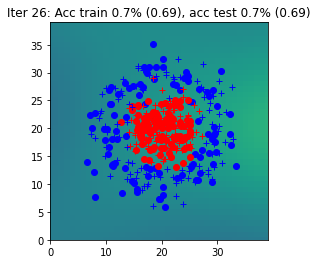

Iter 27: Acc train 0.8% (0.69), acc test 0.7% (0.69)


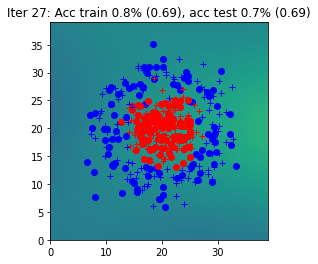

Iter 28: Acc train 0.8% (0.68), acc test 0.7% (0.69)


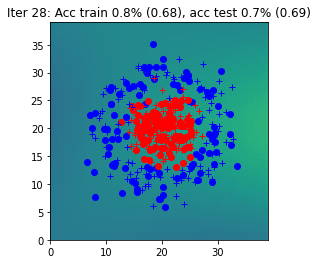

Iter 29: Acc train 0.8% (0.68), acc test 0.7% (0.69)


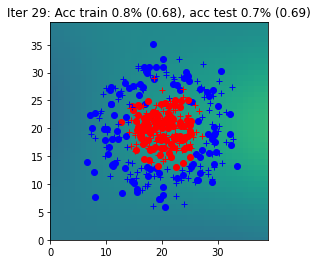

Iter 30: Acc train 0.8% (0.68), acc test 0.7% (0.68)


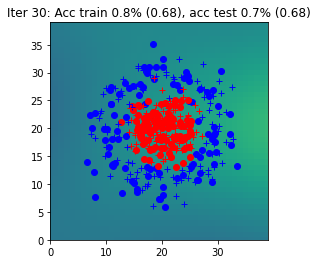

Iter 31: Acc train 0.8% (0.68), acc test 0.7% (0.68)


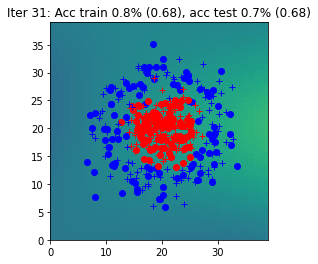

Iter 32: Acc train 0.8% (0.68), acc test 0.8% (0.68)


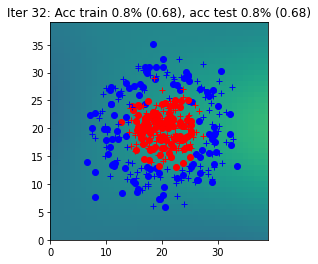

Iter 33: Acc train 0.8% (0.68), acc test 0.8% (0.68)


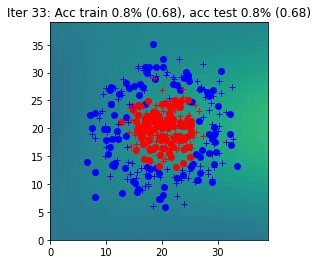

Iter 34: Acc train 0.8% (0.68), acc test 0.8% (0.68)


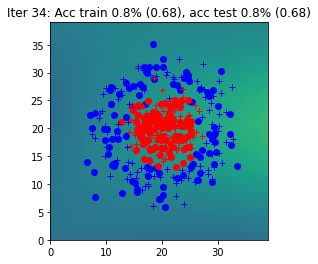

Iter 35: Acc train 0.8% (0.68), acc test 0.8% (0.68)


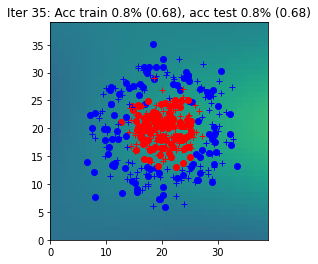

Iter 36: Acc train 0.8% (0.68), acc test 0.8% (0.68)


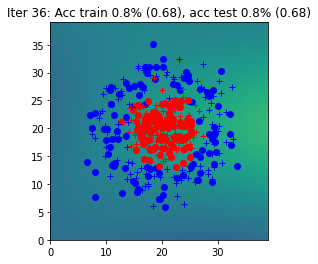

Iter 37: Acc train 0.8% (0.68), acc test 0.8% (0.68)


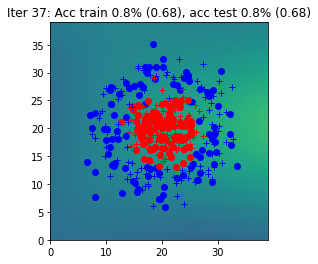

Iter 38: Acc train 0.8% (0.68), acc test 0.8% (0.68)


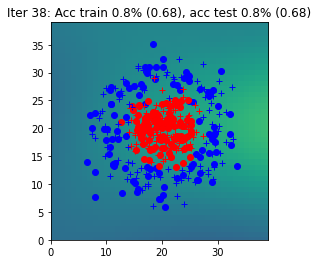

Iter 39: Acc train 0.7% (0.68), acc test 0.7% (0.68)


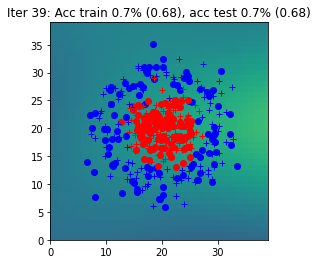

Iter 40: Acc train 0.7% (0.68), acc test 0.7% (0.68)


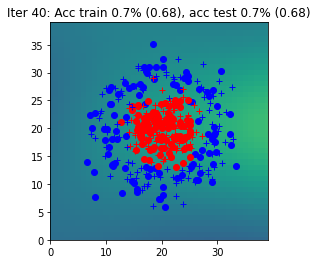

Iter 41: Acc train 0.7% (0.68), acc test 0.7% (0.68)


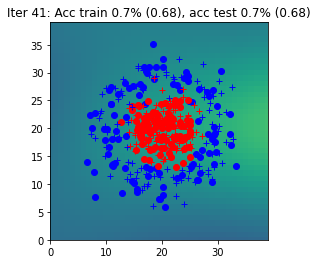

Iter 42: Acc train 0.8% (0.68), acc test 0.8% (0.68)


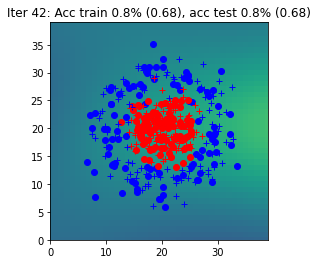

Iter 43: Acc train 0.7% (0.68), acc test 0.7% (0.68)


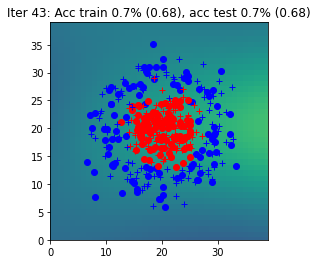

Iter 44: Acc train 0.8% (0.67), acc test 0.8% (0.68)


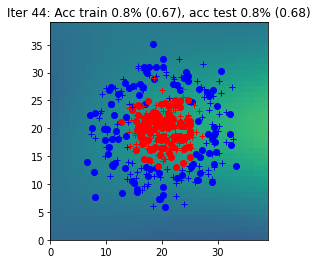

Iter 45: Acc train 0.8% (0.67), acc test 0.8% (0.67)


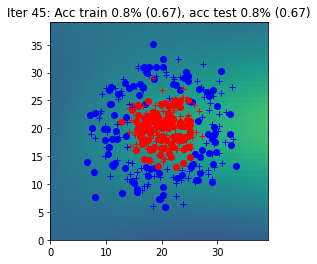

Iter 46: Acc train 0.8% (0.67), acc test 0.8% (0.67)


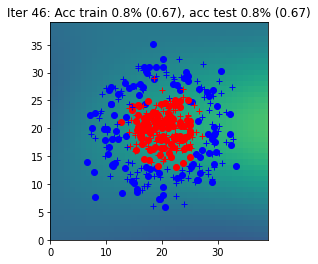

Iter 47: Acc train 0.8% (0.67), acc test 0.8% (0.67)


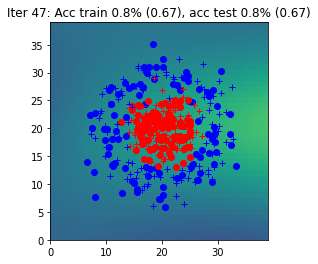

Iter 48: Acc train 0.8% (0.67), acc test 0.8% (0.67)


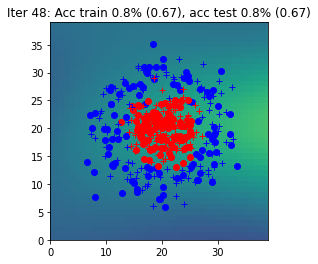

Iter 49: Acc train 0.8% (0.67), acc test 0.8% (0.67)


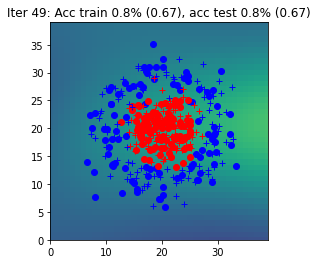

Iter 50: Acc train 0.8% (0.67), acc test 0.8% (0.67)


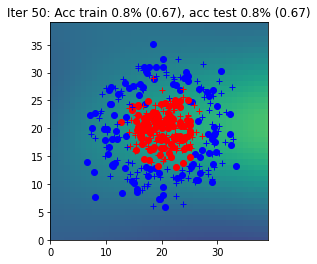

Iter 51: Acc train 0.8% (0.67), acc test 0.8% (0.67)


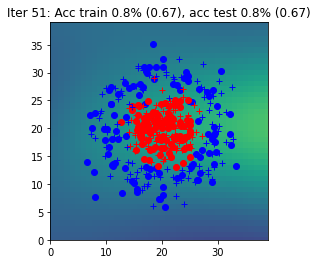

Iter 52: Acc train 0.8% (0.67), acc test 0.8% (0.67)


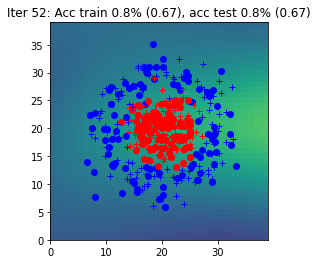

Iter 53: Acc train 0.8% (0.66), acc test 0.8% (0.67)


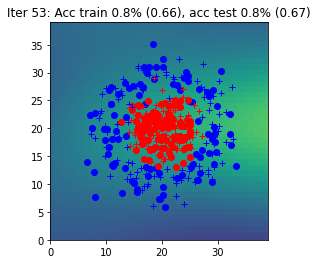

Iter 54: Acc train 0.8% (0.66), acc test 0.8% (0.66)


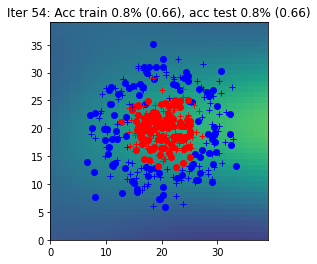

Iter 55: Acc train 0.8% (0.66), acc test 0.8% (0.66)


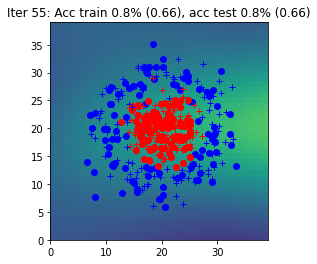

Iter 56: Acc train 0.8% (0.66), acc test 0.8% (0.66)


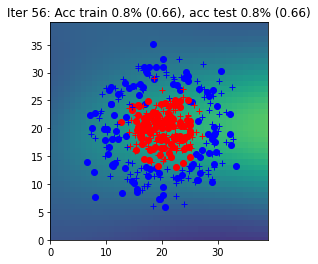

Iter 57: Acc train 0.8% (0.66), acc test 0.8% (0.66)


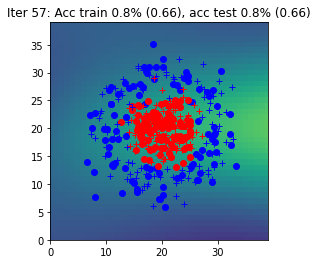

Iter 58: Acc train 0.8% (0.66), acc test 0.8% (0.66)


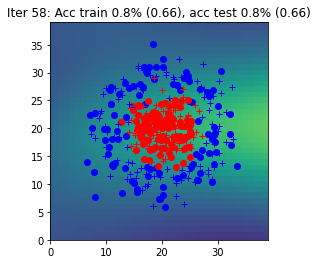

Iter 59: Acc train 0.8% (0.65), acc test 0.8% (0.66)


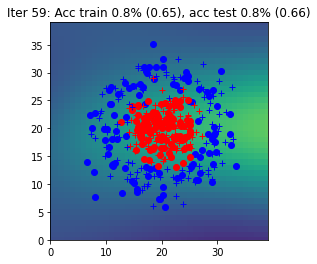

Iter 60: Acc train 0.8% (0.65), acc test 0.8% (0.65)


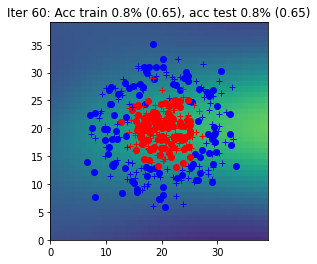

Iter 61: Acc train 0.8% (0.65), acc test 0.8% (0.65)


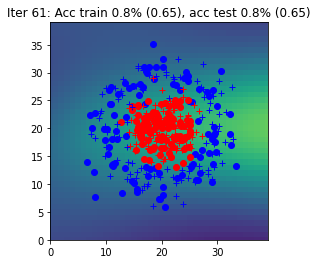

Iter 62: Acc train 0.8% (0.65), acc test 0.8% (0.65)


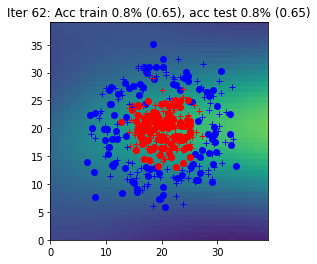

Iter 63: Acc train 0.8% (0.65), acc test 0.8% (0.65)


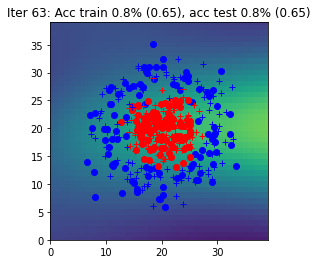

Iter 64: Acc train 0.8% (0.64), acc test 0.8% (0.65)


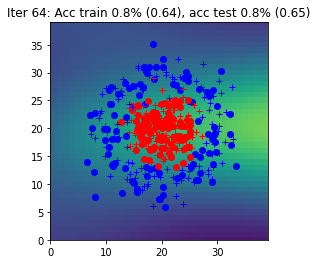

Iter 65: Acc train 0.8% (0.64), acc test 0.8% (0.64)


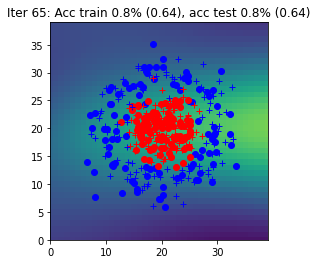

Iter 66: Acc train 0.8% (0.64), acc test 0.8% (0.64)


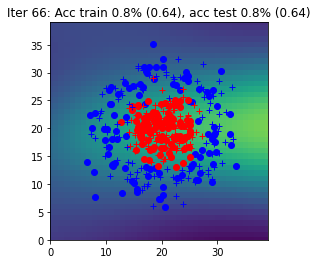

Iter 67: Acc train 0.8% (0.64), acc test 0.8% (0.64)


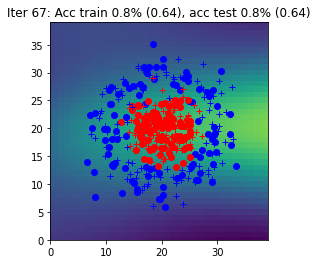

Iter 68: Acc train 0.8% (0.63), acc test 0.8% (0.64)


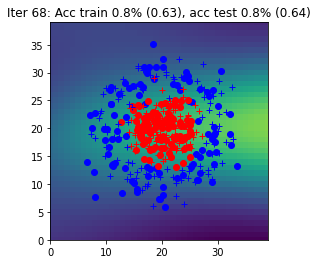

Iter 69: Acc train 0.8% (0.63), acc test 0.8% (0.63)


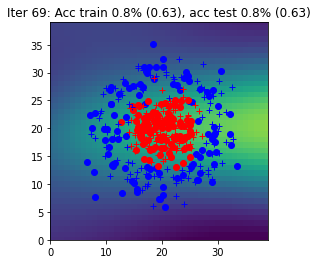

Iter 70: Acc train 0.8% (0.63), acc test 0.8% (0.63)


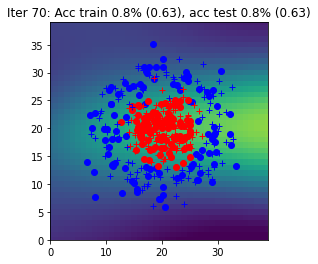

Iter 71: Acc train 0.8% (0.63), acc test 0.8% (0.63)


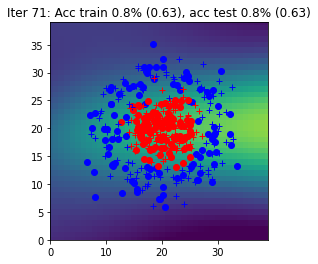

Iter 72: Acc train 0.8% (0.62), acc test 0.8% (0.63)


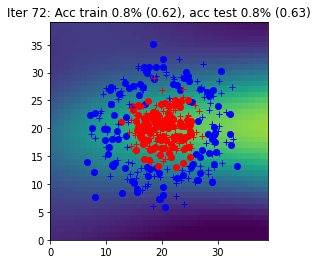

Iter 73: Acc train 0.8% (0.62), acc test 0.8% (0.62)


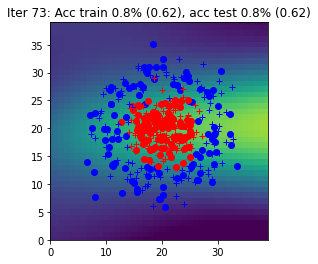

Iter 74: Acc train 0.8% (0.62), acc test 0.8% (0.62)


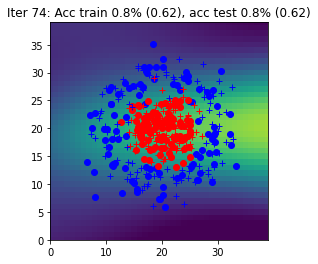

Iter 75: Acc train 0.8% (0.62), acc test 0.8% (0.62)


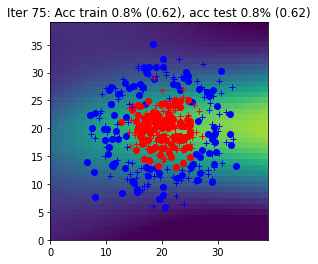

Iter 76: Acc train 0.8% (0.61), acc test 0.8% (0.61)


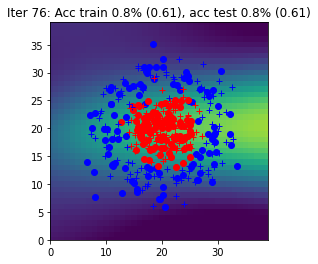

Iter 77: Acc train 0.8% (0.61), acc test 0.8% (0.61)


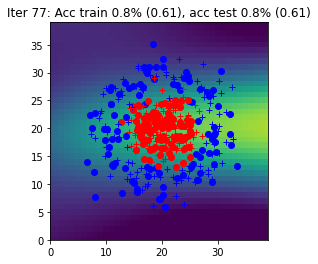

Iter 78: Acc train 0.8% (0.61), acc test 0.8% (0.61)


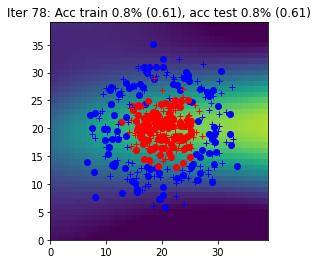

Iter 79: Acc train 0.8% (0.60), acc test 0.8% (0.61)


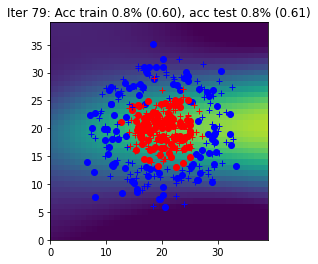

Iter 80: Acc train 0.8% (0.60), acc test 0.8% (0.60)


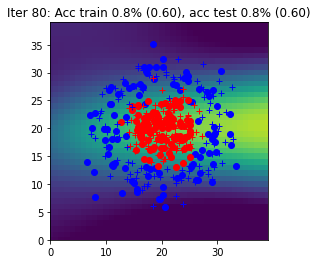

Iter 81: Acc train 0.8% (0.60), acc test 0.8% (0.60)


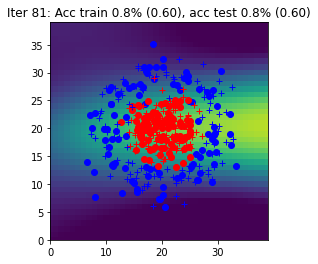

Iter 82: Acc train 0.8% (0.59), acc test 0.8% (0.60)


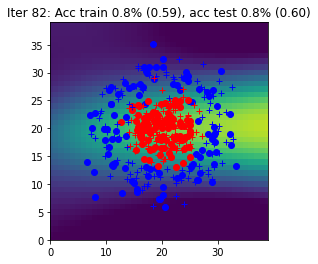

Iter 83: Acc train 0.8% (0.59), acc test 0.8% (0.59)


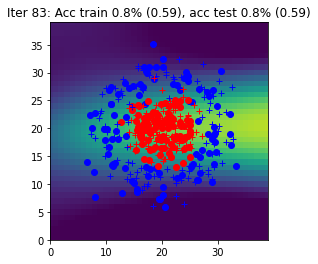

Iter 84: Acc train 0.8% (0.59), acc test 0.8% (0.59)


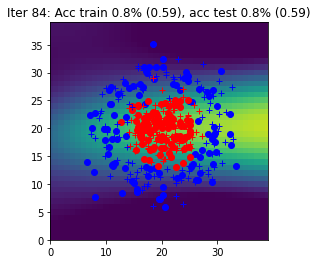

Iter 85: Acc train 0.8% (0.58), acc test 0.8% (0.59)


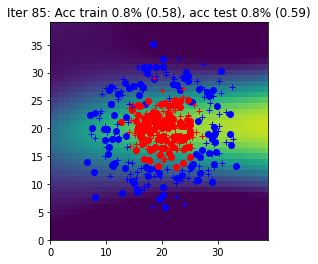

Iter 86: Acc train 0.8% (0.58), acc test 0.8% (0.58)


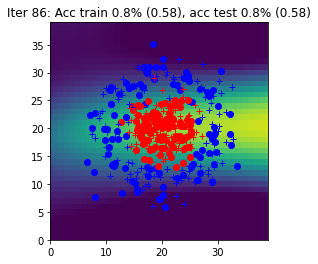

Iter 87: Acc train 0.8% (0.58), acc test 0.8% (0.58)


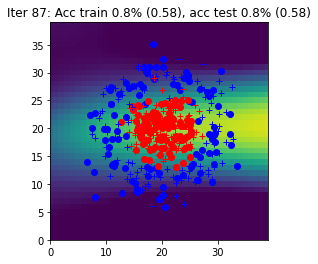

Iter 88: Acc train 0.8% (0.57), acc test 0.8% (0.58)


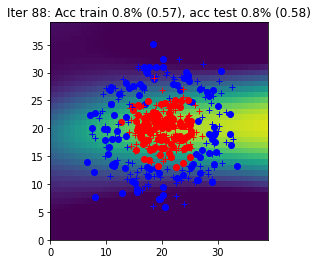

Iter 89: Acc train 0.8% (0.57), acc test 0.8% (0.57)


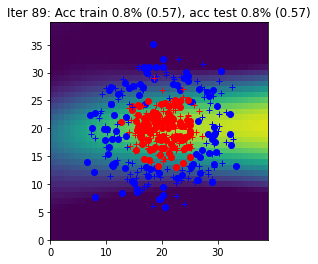

Iter 90: Acc train 0.8% (0.57), acc test 0.8% (0.57)


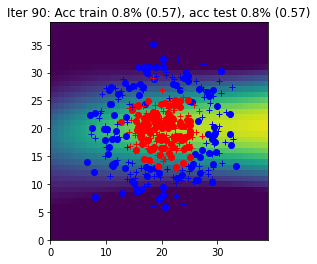

Iter 91: Acc train 0.8% (0.56), acc test 0.8% (0.57)


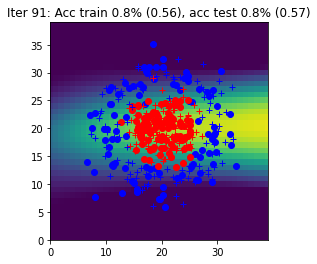

Iter 92: Acc train 0.8% (0.56), acc test 0.8% (0.56)


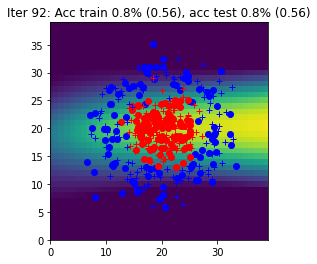

Iter 93: Acc train 0.8% (0.56), acc test 0.8% (0.56)


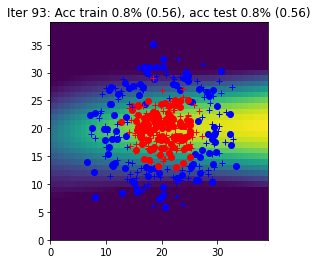

Iter 94: Acc train 0.8% (0.56), acc test 0.8% (0.56)


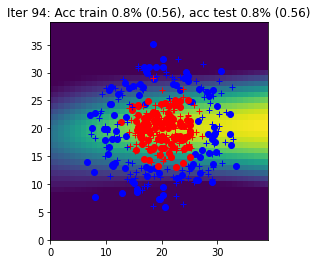

Iter 95: Acc train 0.8% (0.55), acc test 0.8% (0.55)


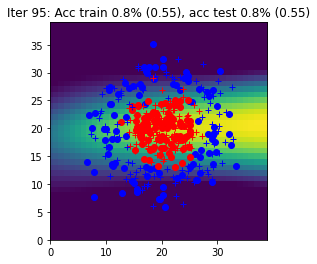

Iter 96: Acc train 0.8% (0.55), acc test 0.8% (0.55)


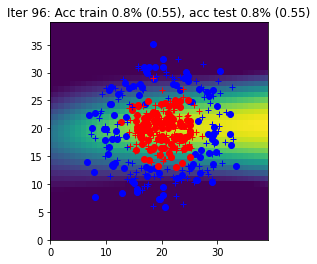

Iter 97: Acc train 0.8% (0.55), acc test 0.8% (0.55)


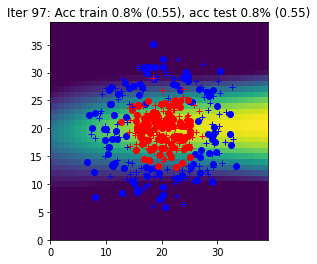

Iter 98: Acc train 0.8% (0.54), acc test 0.8% (0.54)


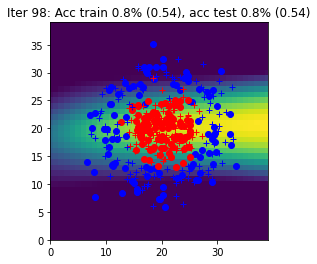

Iter 99: Acc train 0.8% (0.54), acc test 0.8% (0.54)


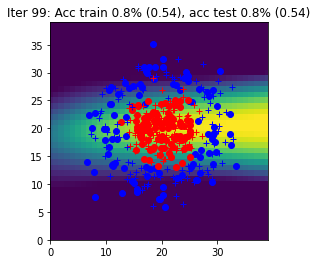

Iter 100: Acc train 0.8% (0.54), acc test 0.8% (0.54)


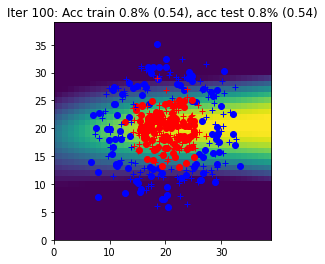

Iter 101: Acc train 0.8% (0.53), acc test 0.8% (0.53)


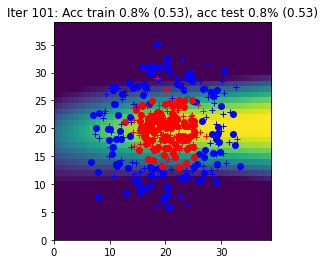

Iter 102: Acc train 0.8% (0.53), acc test 0.8% (0.53)


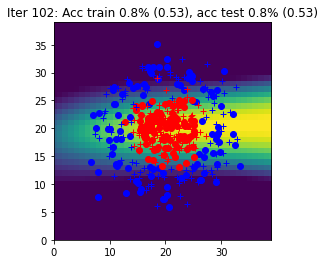

Iter 103: Acc train 0.8% (0.53), acc test 0.8% (0.53)


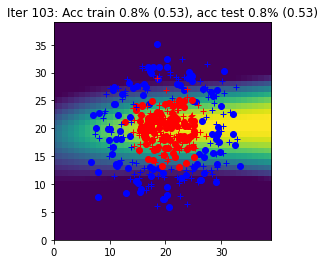

Iter 104: Acc train 0.8% (0.53), acc test 0.8% (0.53)


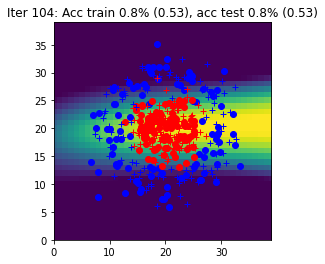

Iter 105: Acc train 0.8% (0.52), acc test 0.8% (0.52)


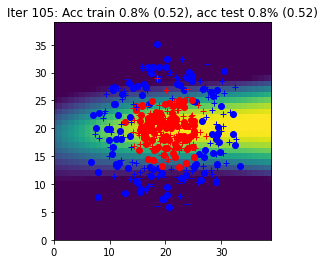

Iter 106: Acc train 0.8% (0.52), acc test 0.8% (0.52)


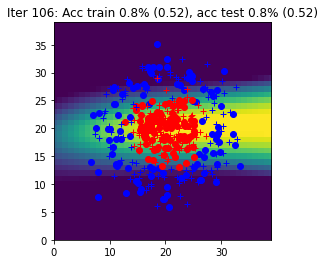

Iter 107: Acc train 0.8% (0.52), acc test 0.8% (0.52)


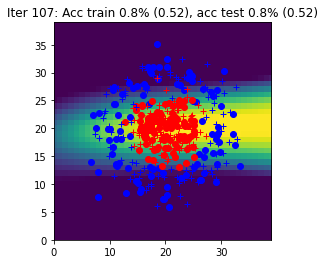

Iter 108: Acc train 0.8% (0.52), acc test 0.8% (0.52)


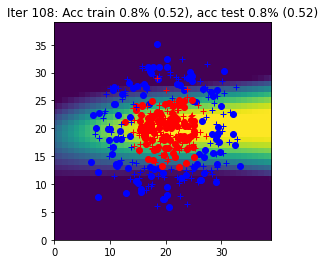

Iter 109: Acc train 0.8% (0.51), acc test 0.8% (0.51)


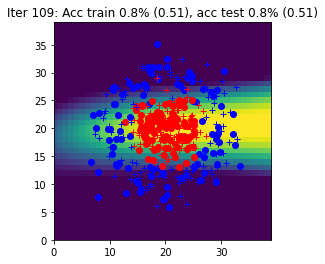

Iter 110: Acc train 0.8% (0.51), acc test 0.8% (0.51)


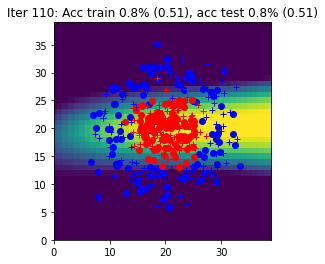

Iter 111: Acc train 0.8% (0.51), acc test 0.8% (0.51)


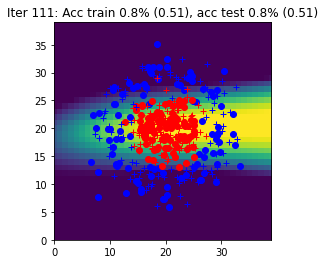

Iter 112: Acc train 0.8% (0.51), acc test 0.8% (0.51)


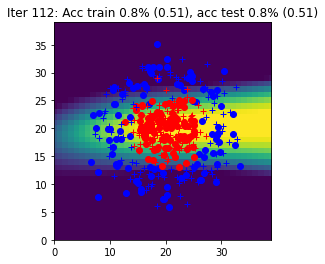

Iter 113: Acc train 0.8% (0.50), acc test 0.8% (0.50)


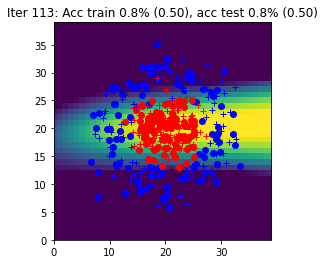

Iter 114: Acc train 0.8% (0.50), acc test 0.8% (0.50)


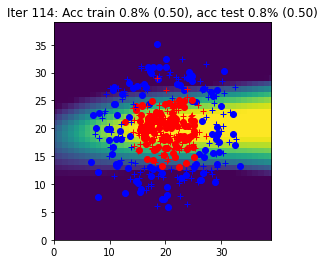

Iter 115: Acc train 0.8% (0.50), acc test 0.8% (0.50)


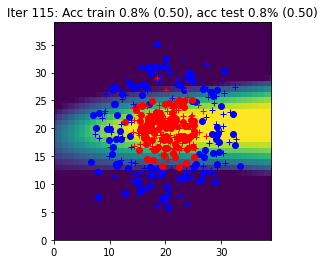

Iter 116: Acc train 0.8% (0.50), acc test 0.8% (0.50)


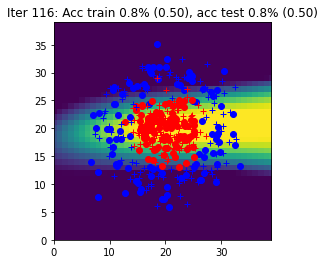

Iter 117: Acc train 0.8% (0.50), acc test 0.8% (0.50)


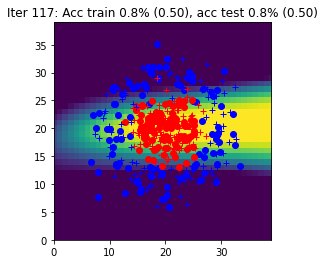

Iter 118: Acc train 0.8% (0.49), acc test 0.8% (0.49)


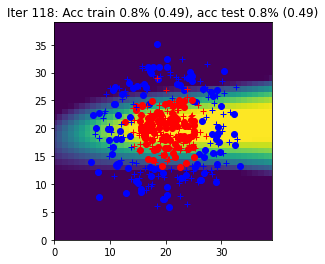

Iter 119: Acc train 0.8% (0.49), acc test 0.8% (0.49)


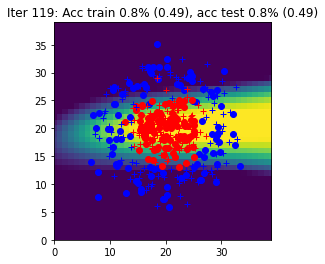

Iter 120: Acc train 0.8% (0.49), acc test 0.8% (0.49)


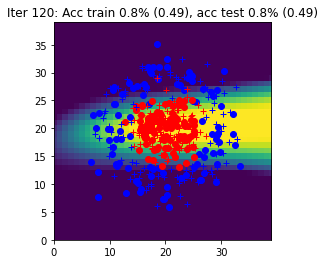

Iter 121: Acc train 0.8% (0.49), acc test 0.8% (0.49)


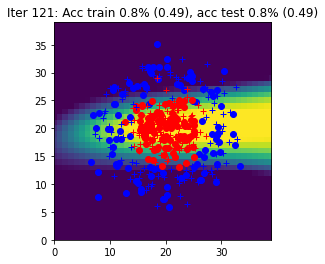

Iter 122: Acc train 0.8% (0.49), acc test 0.8% (0.49)


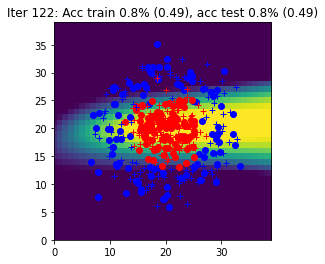

Iter 123: Acc train 0.8% (0.48), acc test 0.8% (0.48)


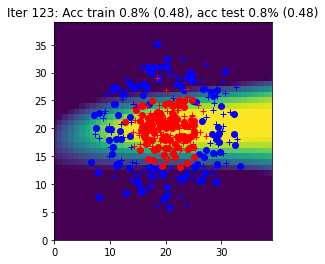

Iter 124: Acc train 0.8% (0.48), acc test 0.8% (0.48)


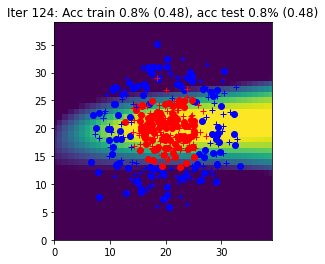

Iter 125: Acc train 0.8% (0.48), acc test 0.8% (0.48)


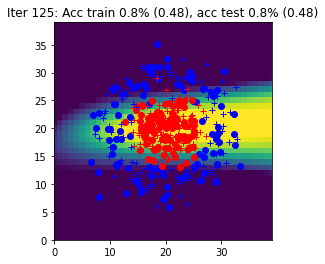

Iter 126: Acc train 0.8% (0.48), acc test 0.8% (0.48)


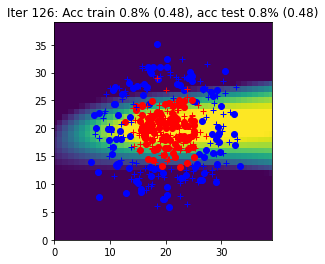

Iter 127: Acc train 0.8% (0.48), acc test 0.8% (0.48)


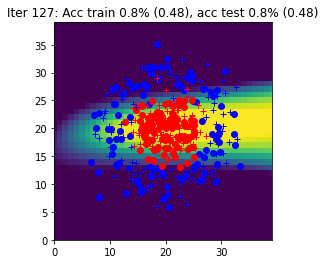

Iter 128: Acc train 0.8% (0.47), acc test 0.8% (0.47)


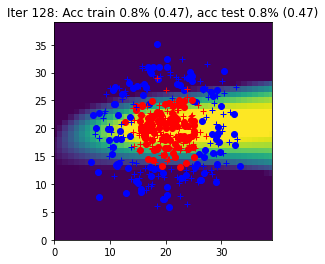

Iter 129: Acc train 0.8% (0.47), acc test 0.8% (0.47)


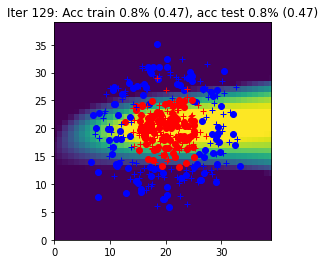

Iter 130: Acc train 0.8% (0.47), acc test 0.8% (0.47)


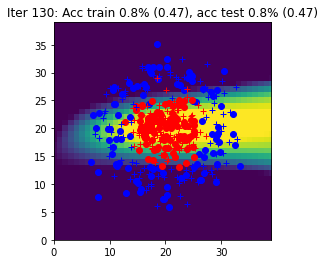

Iter 131: Acc train 0.8% (0.47), acc test 0.8% (0.47)


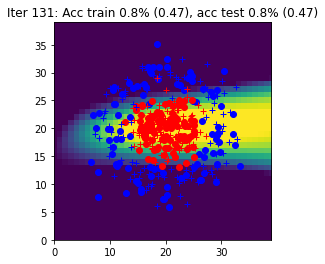

Iter 132: Acc train 0.8% (0.47), acc test 0.8% (0.47)


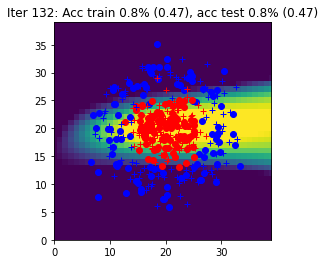

Iter 133: Acc train 0.8% (0.47), acc test 0.8% (0.46)


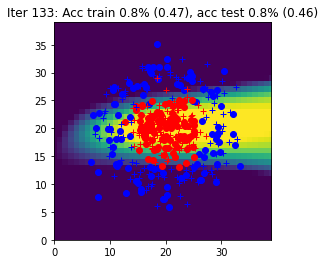

Iter 134: Acc train 0.8% (0.46), acc test 0.8% (0.46)


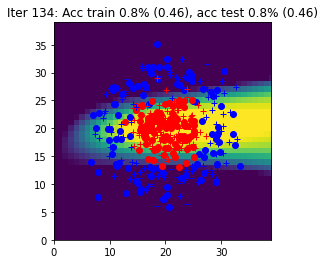

Iter 135: Acc train 0.8% (0.46), acc test 0.8% (0.46)


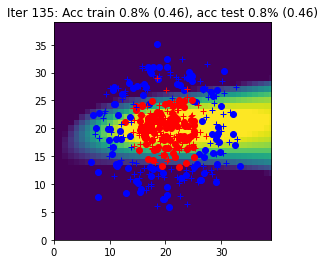

Iter 136: Acc train 0.8% (0.46), acc test 0.8% (0.46)


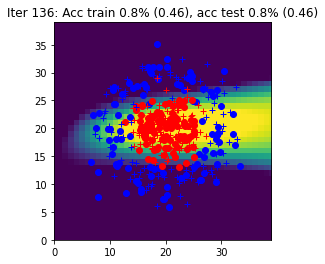

Iter 137: Acc train 0.8% (0.46), acc test 0.8% (0.46)


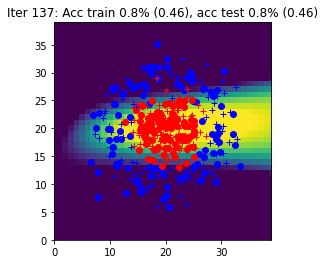

Iter 138: Acc train 0.8% (0.46), acc test 0.8% (0.45)


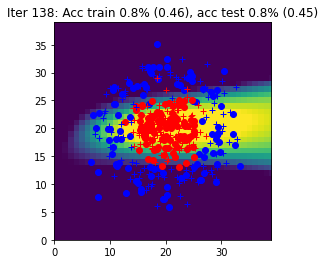

Iter 139: Acc train 0.8% (0.45), acc test 0.8% (0.45)


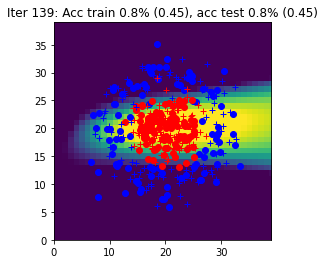

Iter 140: Acc train 0.8% (0.45), acc test 0.8% (0.45)


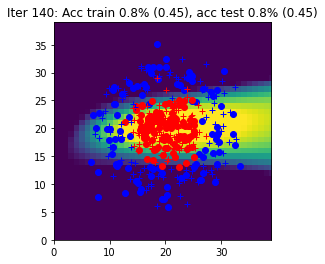

Iter 141: Acc train 0.8% (0.45), acc test 0.8% (0.45)


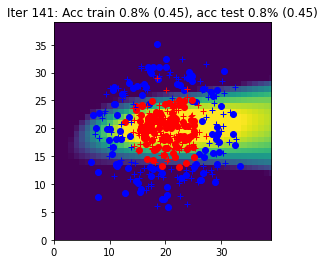

Iter 142: Acc train 0.8% (0.45), acc test 0.8% (0.45)


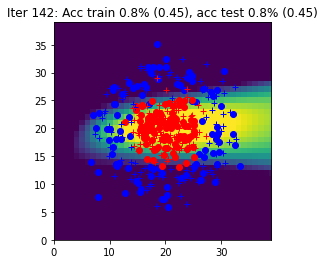

Iter 143: Acc train 0.8% (0.44), acc test 0.8% (0.44)


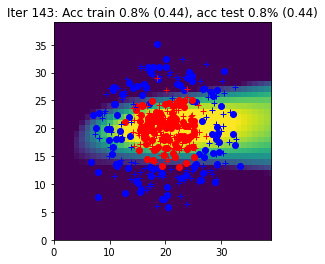

Iter 144: Acc train 0.8% (0.44), acc test 0.8% (0.44)


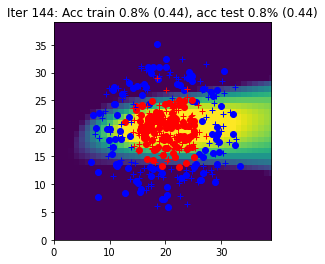

Iter 145: Acc train 0.8% (0.44), acc test 0.8% (0.44)


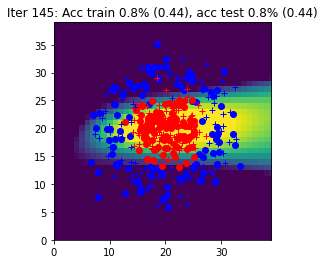

Iter 146: Acc train 0.8% (0.44), acc test 0.9% (0.44)


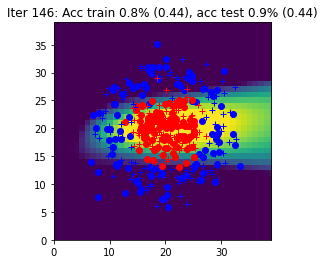

Iter 147: Acc train 0.8% (0.44), acc test 0.9% (0.43)


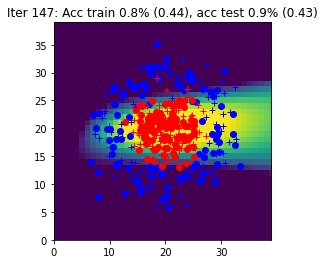

Iter 148: Acc train 0.8% (0.43), acc test 0.9% (0.43)


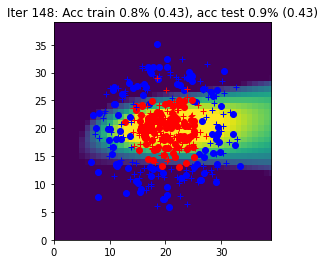

Iter 149: Acc train 0.8% (0.43), acc test 0.9% (0.43)


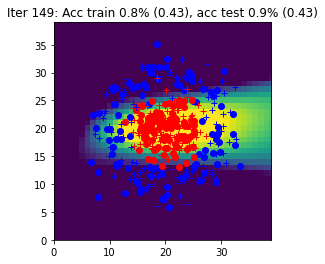

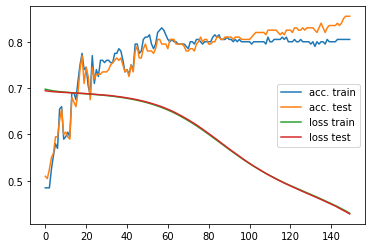

In [9]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 11
nx = data.Xtrain.shape[1]
nh = 13
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd

        yhat, outputs = forward(params, X)
        #ltrain, acc = loss_accuracy(yhat, Y)
        grads = backward(params, outputs, Y)
        params = sgd(params, grads, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  


    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [10]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights
    
    params["Wh"] = torch.randn(nh,nx)*0.3
    params["Wy"] = torch.randn(ny, nh)*0.3
    params["bh"] = torch.zeros(nh,1)*0.3
    params["by"] = torch.zeros(ny,1)*0.3
    
    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part. 

The function `backward` is no longer used because of "autograd". 

In [11]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    params["Wh"] = None
    params["Wy"] = None
    params["bh"] = None
    params["by"] = None    

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

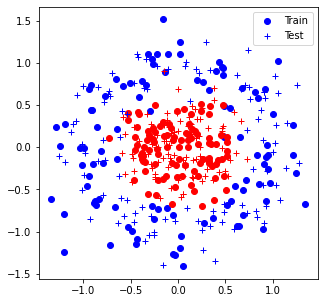

Iter 0: Acc train 0.5% (0.69), acc test 0.5% (0.70)


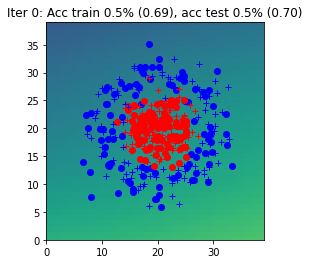

Iter 1: Acc train 0.5% (0.69), acc test 0.5% (0.70)


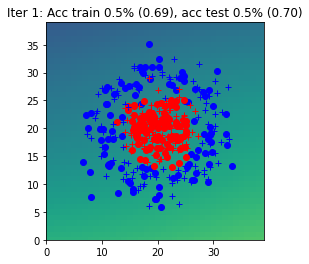

Iter 2: Acc train 0.5% (0.69), acc test 0.5% (0.70)


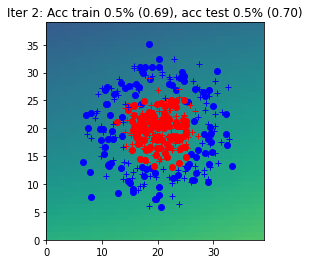

Iter 3: Acc train 0.5% (0.69), acc test 0.5% (0.70)


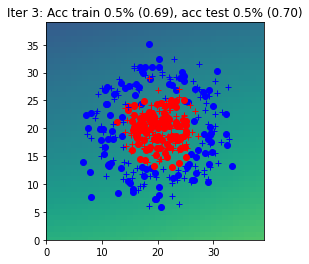

Iter 4: Acc train 0.5% (0.69), acc test 0.5% (0.70)


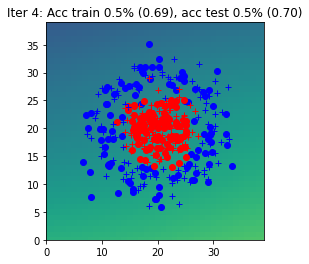

Iter 5: Acc train 0.5% (0.69), acc test 0.5% (0.70)


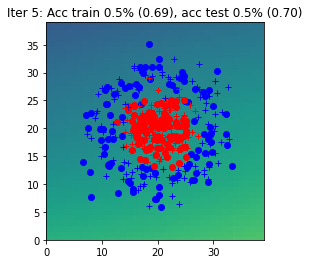

Iter 6: Acc train 0.5% (0.69), acc test 0.5% (0.70)


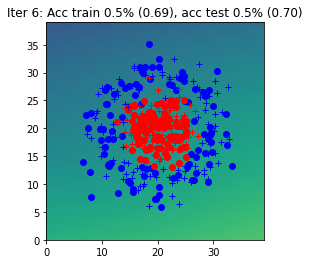

Iter 7: Acc train 0.5% (0.69), acc test 0.5% (0.70)


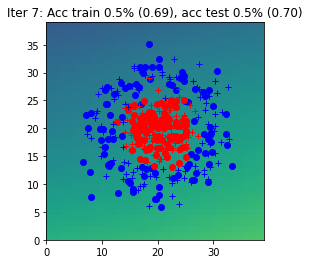

Iter 8: Acc train 0.5% (0.69), acc test 0.5% (0.70)


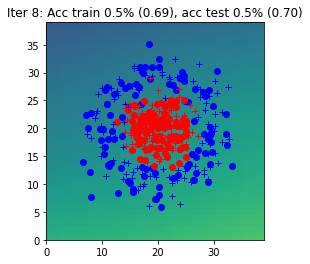

Iter 9: Acc train 0.5% (0.69), acc test 0.5% (0.70)


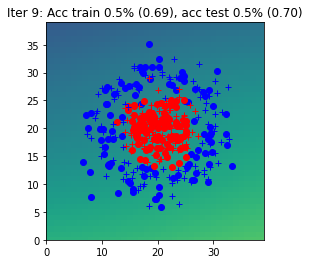

Iter 10: Acc train 0.5% (0.69), acc test 0.5% (0.70)


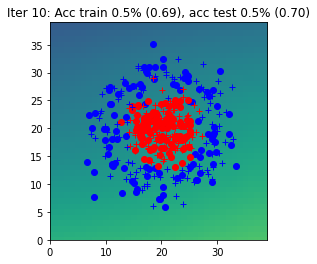

Iter 11: Acc train 0.5% (0.69), acc test 0.5% (0.70)


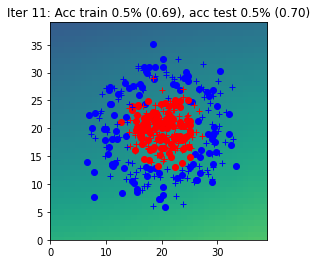

Iter 12: Acc train 0.5% (0.69), acc test 0.5% (0.70)


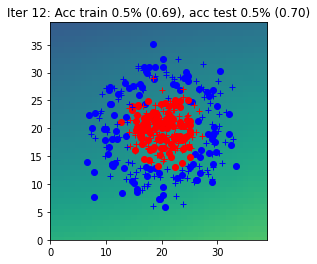

Iter 13: Acc train 0.5% (0.69), acc test 0.5% (0.70)


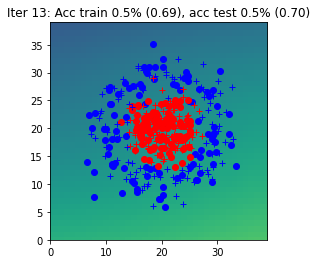

Iter 14: Acc train 0.5% (0.69), acc test 0.5% (0.70)


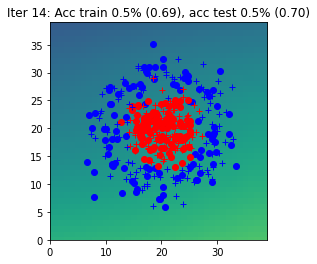

Iter 15: Acc train 0.5% (0.69), acc test 0.5% (0.70)


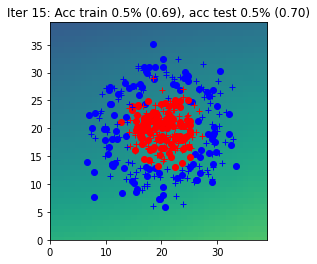

Iter 16: Acc train 0.5% (0.69), acc test 0.5% (0.70)


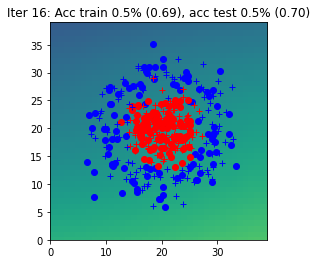

Iter 17: Acc train 0.5% (0.69), acc test 0.5% (0.70)


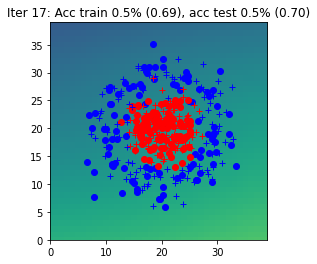

Iter 18: Acc train 0.5% (0.69), acc test 0.5% (0.70)


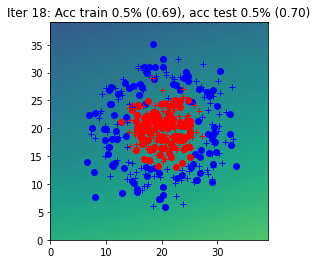

Iter 19: Acc train 0.5% (0.69), acc test 0.5% (0.70)


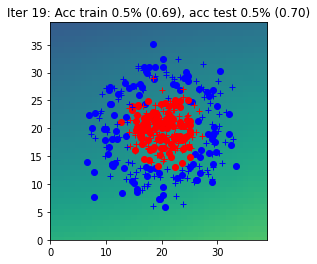

Iter 20: Acc train 0.5% (0.69), acc test 0.5% (0.70)


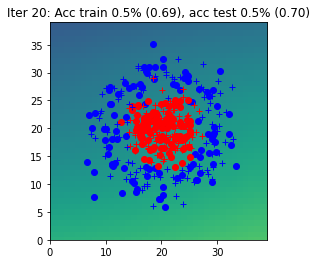

Iter 21: Acc train 0.5% (0.69), acc test 0.5% (0.70)


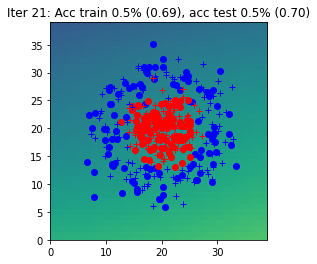

Iter 22: Acc train 0.5% (0.69), acc test 0.5% (0.70)


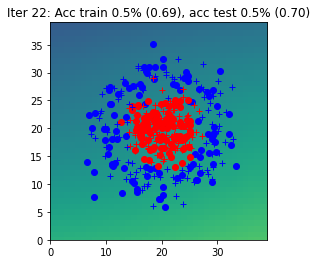

Iter 23: Acc train 0.5% (0.69), acc test 0.5% (0.70)


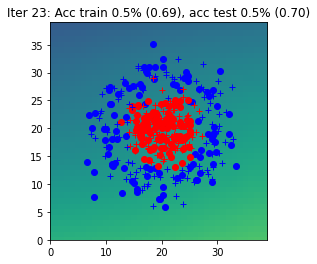

Iter 24: Acc train 0.5% (0.69), acc test 0.5% (0.70)


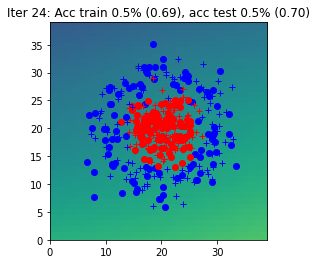

Iter 25: Acc train 0.5% (0.69), acc test 0.5% (0.70)


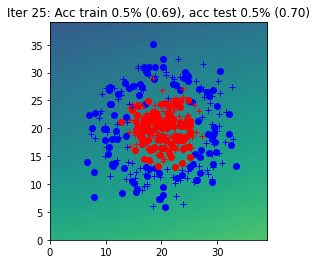

Iter 26: Acc train 0.5% (0.69), acc test 0.5% (0.70)


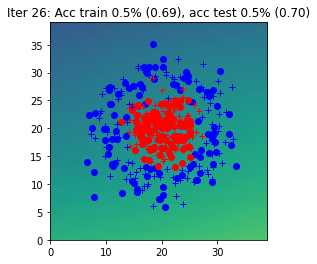

Iter 27: Acc train 0.5% (0.69), acc test 0.5% (0.70)


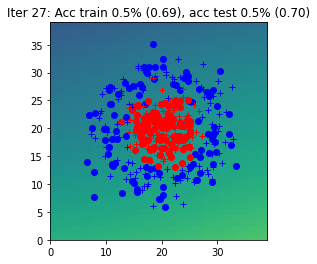

Iter 28: Acc train 0.5% (0.69), acc test 0.5% (0.70)


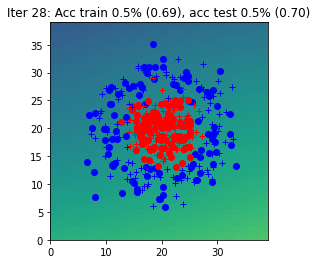

Iter 29: Acc train 0.5% (0.69), acc test 0.5% (0.70)


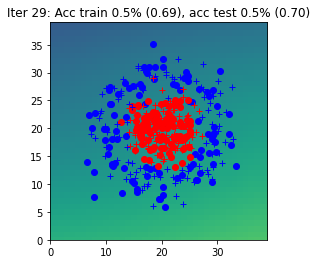

Iter 30: Acc train 0.5% (0.69), acc test 0.5% (0.70)


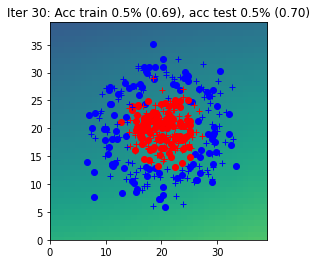

Iter 31: Acc train 0.5% (0.69), acc test 0.5% (0.70)


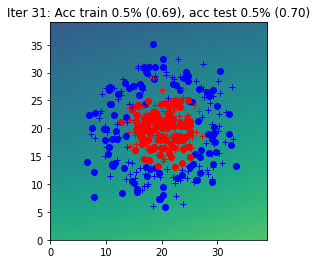

Iter 32: Acc train 0.5% (0.69), acc test 0.5% (0.70)


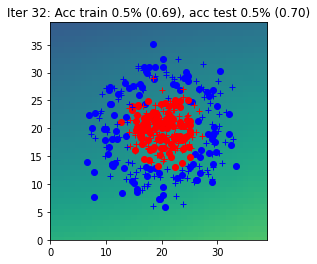

Iter 33: Acc train 0.5% (0.69), acc test 0.5% (0.70)


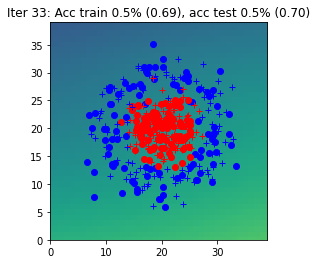

Iter 34: Acc train 0.5% (0.69), acc test 0.5% (0.70)


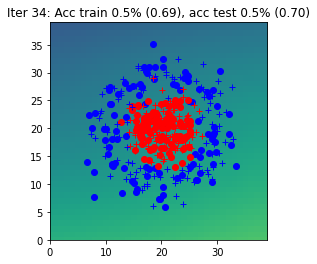

Iter 35: Acc train 0.5% (0.69), acc test 0.5% (0.70)


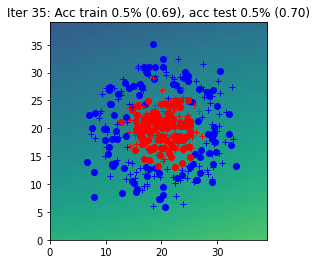

Iter 36: Acc train 0.5% (0.69), acc test 0.5% (0.70)


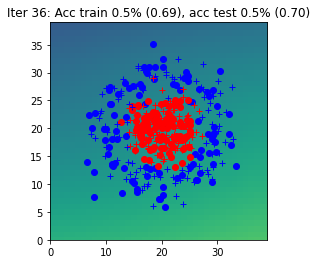

Iter 37: Acc train 0.5% (0.69), acc test 0.5% (0.70)


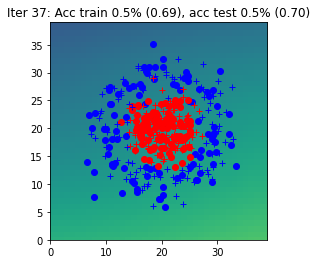

Iter 38: Acc train 0.5% (0.69), acc test 0.5% (0.70)


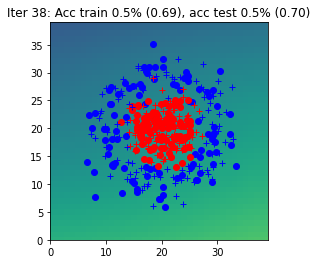

Iter 39: Acc train 0.5% (0.69), acc test 0.5% (0.70)


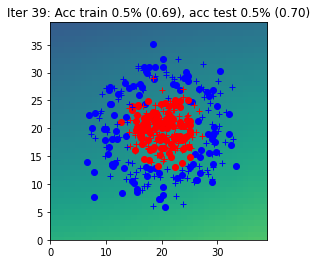

Iter 40: Acc train 0.5% (0.69), acc test 0.5% (0.70)


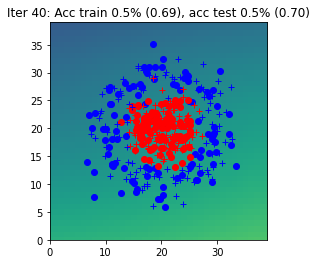

Iter 41: Acc train 0.5% (0.69), acc test 0.5% (0.70)


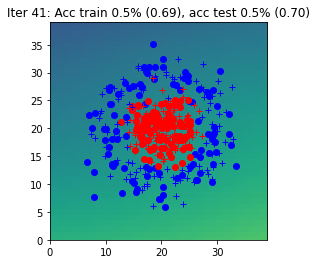

Iter 42: Acc train 0.5% (0.69), acc test 0.5% (0.70)


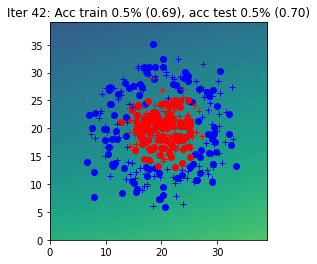

Iter 43: Acc train 0.5% (0.69), acc test 0.5% (0.70)


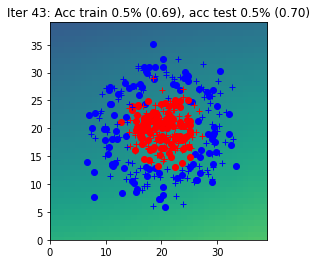

Iter 44: Acc train 0.5% (0.69), acc test 0.5% (0.70)


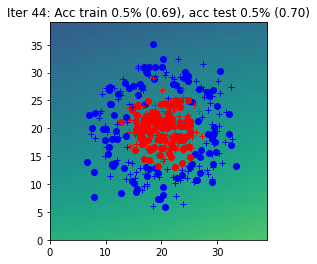

Iter 45: Acc train 0.5% (0.69), acc test 0.5% (0.70)


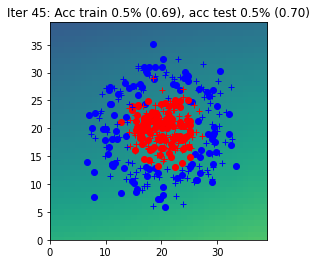

Iter 46: Acc train 0.5% (0.69), acc test 0.5% (0.70)


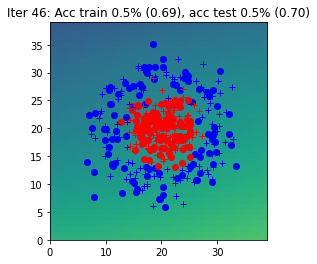

Iter 47: Acc train 0.5% (0.69), acc test 0.5% (0.70)


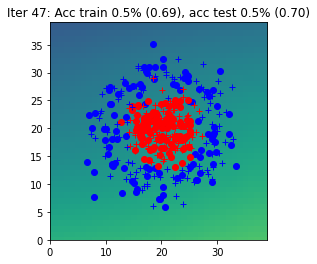

Iter 48: Acc train 0.5% (0.69), acc test 0.5% (0.70)


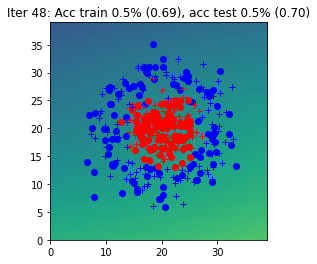

Iter 49: Acc train 0.5% (0.69), acc test 0.5% (0.70)


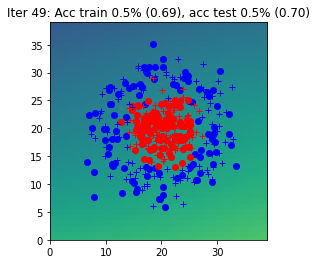

Iter 50: Acc train 0.5% (0.69), acc test 0.5% (0.70)


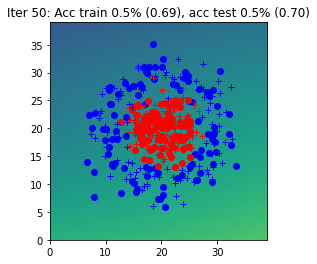

Iter 51: Acc train 0.5% (0.69), acc test 0.5% (0.70)


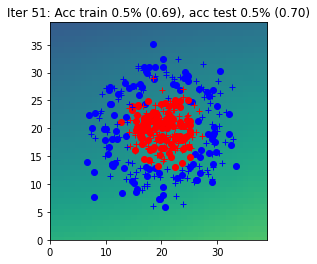

Iter 52: Acc train 0.5% (0.69), acc test 0.5% (0.70)


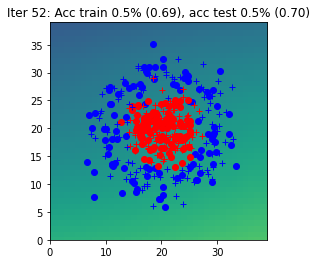

Iter 53: Acc train 0.5% (0.69), acc test 0.5% (0.70)


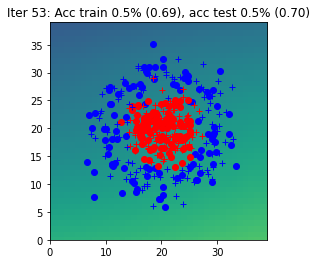

Iter 54: Acc train 0.5% (0.69), acc test 0.5% (0.70)


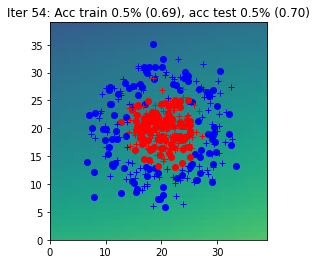

Iter 55: Acc train 0.5% (0.69), acc test 0.5% (0.70)


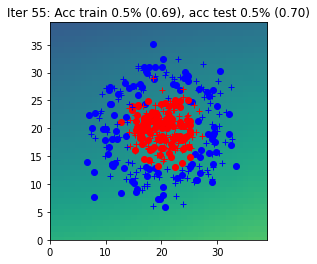

Iter 56: Acc train 0.5% (0.69), acc test 0.5% (0.70)


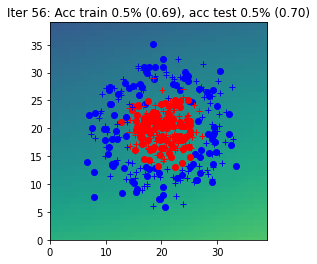

Iter 57: Acc train 0.5% (0.69), acc test 0.5% (0.70)


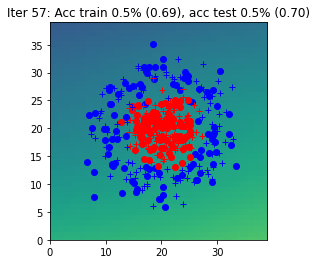

Iter 58: Acc train 0.5% (0.69), acc test 0.5% (0.70)


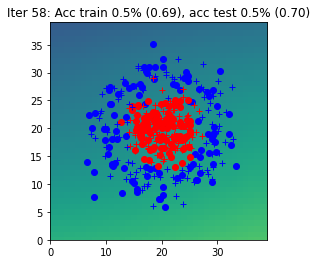

Iter 59: Acc train 0.5% (0.69), acc test 0.5% (0.70)


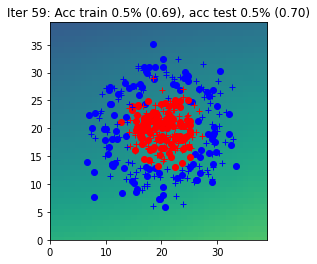

Iter 60: Acc train 0.5% (0.69), acc test 0.5% (0.70)


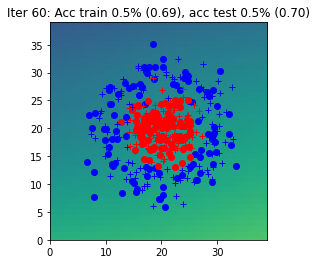

Iter 61: Acc train 0.5% (0.69), acc test 0.5% (0.70)


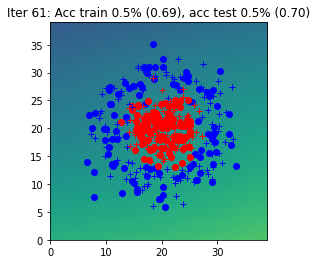

Iter 62: Acc train 0.5% (0.69), acc test 0.5% (0.70)


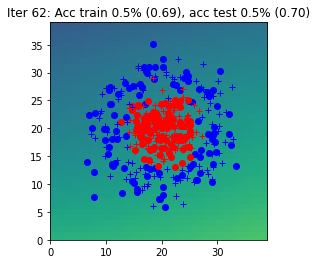

Iter 63: Acc train 0.5% (0.69), acc test 0.5% (0.70)


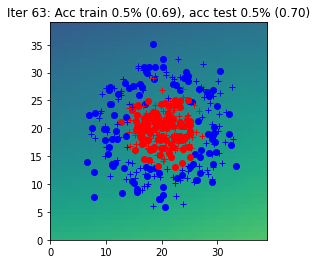

Iter 64: Acc train 0.5% (0.69), acc test 0.5% (0.70)


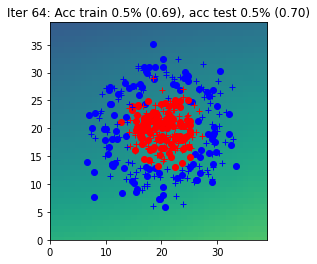

Iter 65: Acc train 0.5% (0.69), acc test 0.5% (0.70)


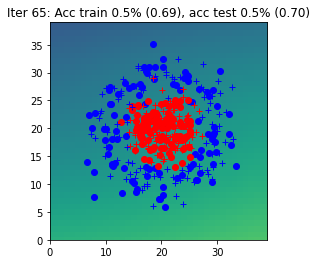

Iter 66: Acc train 0.5% (0.69), acc test 0.5% (0.70)


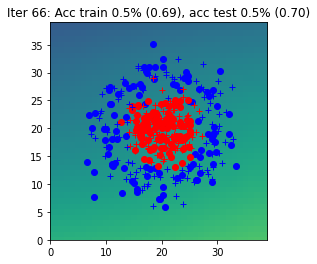

Iter 67: Acc train 0.5% (0.69), acc test 0.5% (0.70)


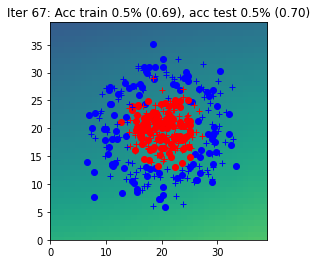

Iter 68: Acc train 0.5% (0.69), acc test 0.5% (0.70)


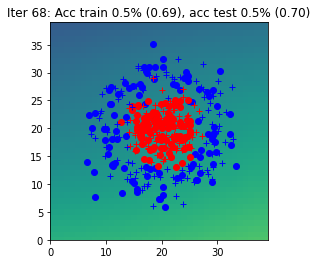

Iter 69: Acc train 0.5% (0.69), acc test 0.5% (0.70)


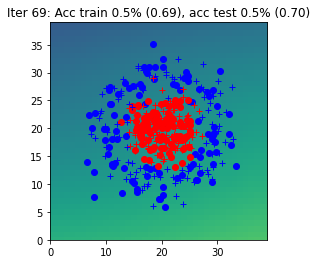

Iter 70: Acc train 0.5% (0.69), acc test 0.5% (0.70)


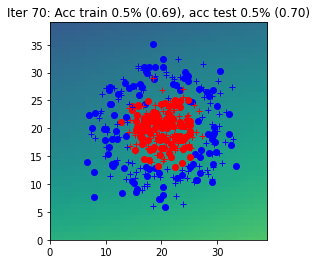

Iter 71: Acc train 0.5% (0.69), acc test 0.5% (0.70)


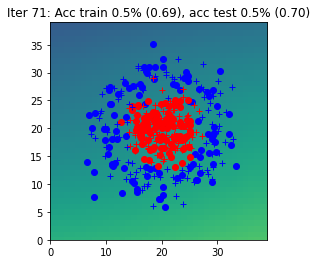

Iter 72: Acc train 0.5% (0.69), acc test 0.5% (0.70)


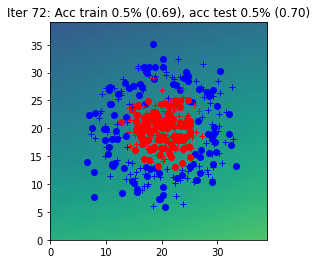

Iter 73: Acc train 0.5% (0.69), acc test 0.5% (0.70)


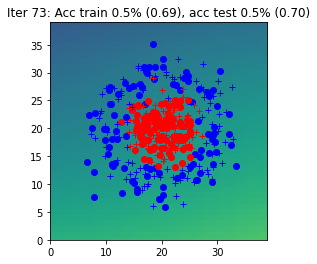

Iter 74: Acc train 0.5% (0.69), acc test 0.5% (0.70)


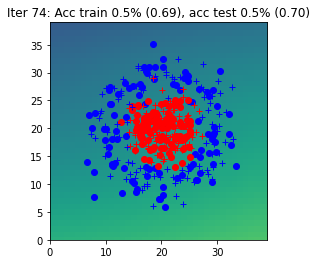

Iter 75: Acc train 0.5% (0.69), acc test 0.5% (0.70)


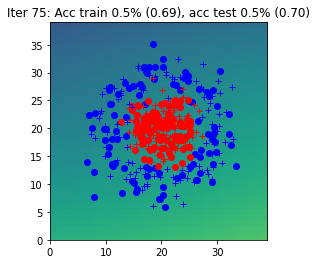

Iter 76: Acc train 0.5% (0.69), acc test 0.5% (0.70)


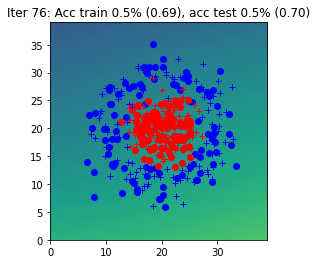

Iter 77: Acc train 0.5% (0.69), acc test 0.5% (0.70)


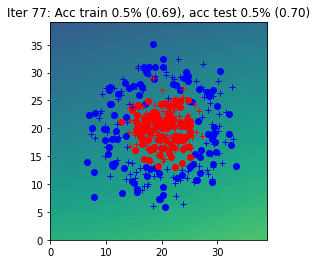

Iter 78: Acc train 0.5% (0.69), acc test 0.5% (0.70)


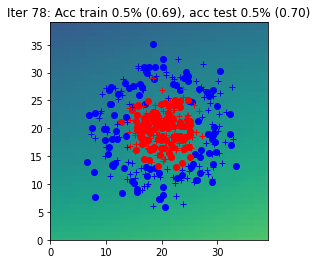

Iter 79: Acc train 0.5% (0.69), acc test 0.5% (0.70)


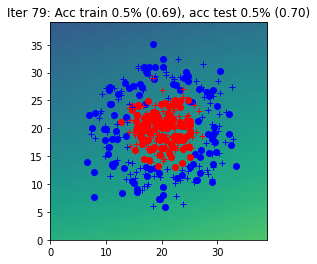

Iter 80: Acc train 0.5% (0.69), acc test 0.5% (0.70)


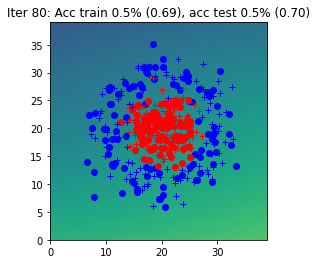

Iter 81: Acc train 0.5% (0.69), acc test 0.5% (0.70)


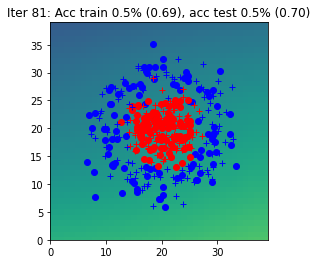

Iter 82: Acc train 0.5% (0.69), acc test 0.5% (0.70)


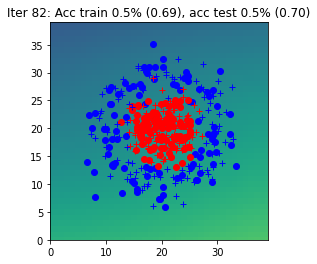

Iter 83: Acc train 0.5% (0.69), acc test 0.5% (0.70)


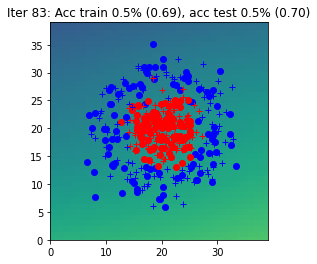

Iter 84: Acc train 0.5% (0.69), acc test 0.5% (0.70)


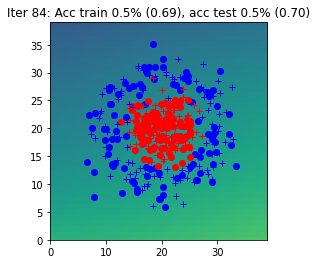

Iter 85: Acc train 0.5% (0.69), acc test 0.5% (0.70)


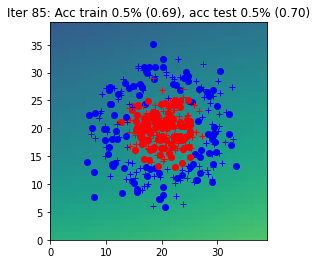

Iter 86: Acc train 0.5% (0.69), acc test 0.5% (0.70)


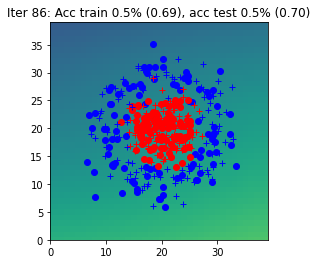

Iter 87: Acc train 0.5% (0.69), acc test 0.5% (0.70)


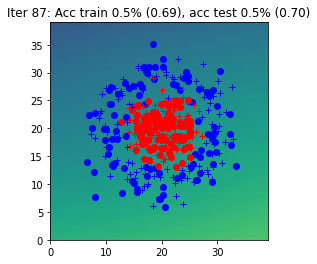

Iter 88: Acc train 0.5% (0.69), acc test 0.5% (0.70)


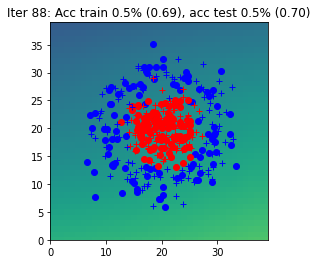

Iter 89: Acc train 0.5% (0.69), acc test 0.5% (0.70)


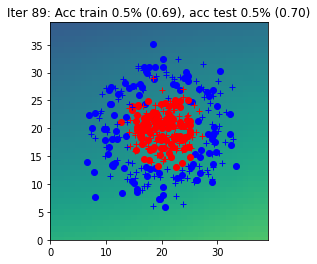

Iter 90: Acc train 0.5% (0.69), acc test 0.5% (0.70)


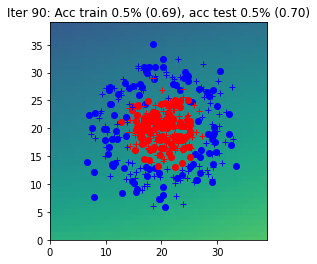

Iter 91: Acc train 0.5% (0.69), acc test 0.5% (0.70)


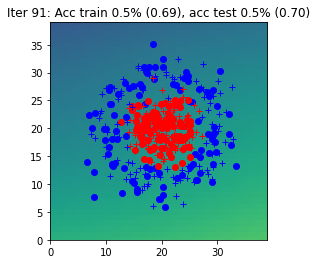

Iter 92: Acc train 0.5% (0.69), acc test 0.5% (0.70)


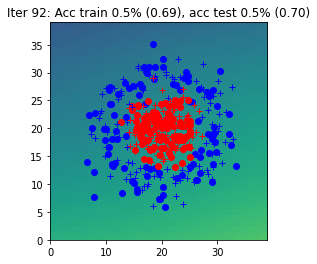

Iter 93: Acc train 0.5% (0.69), acc test 0.5% (0.70)


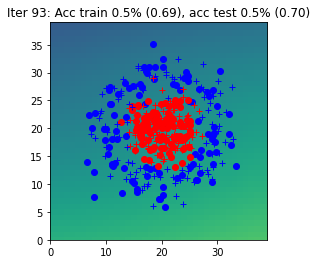

Iter 94: Acc train 0.5% (0.69), acc test 0.5% (0.70)


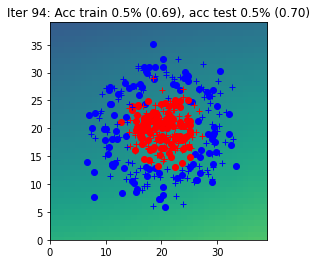

Iter 95: Acc train 0.5% (0.69), acc test 0.5% (0.70)


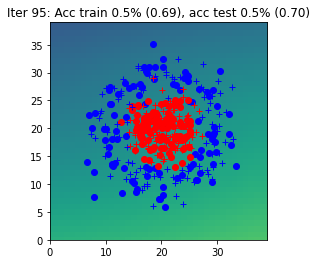

Iter 96: Acc train 0.5% (0.69), acc test 0.5% (0.70)


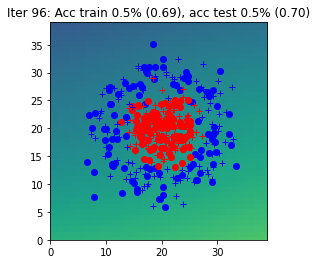

Iter 97: Acc train 0.5% (0.69), acc test 0.5% (0.70)


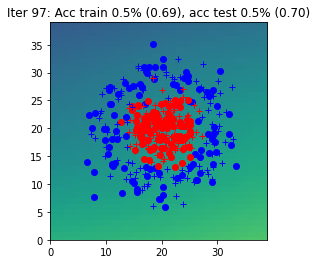

Iter 98: Acc train 0.5% (0.69), acc test 0.5% (0.70)


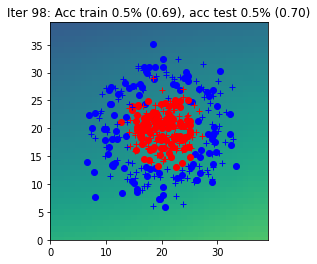

Iter 99: Acc train 0.5% (0.69), acc test 0.5% (0.70)


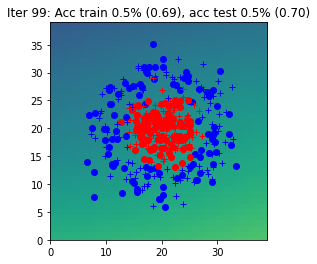

Iter 100: Acc train 0.5% (0.69), acc test 0.5% (0.70)


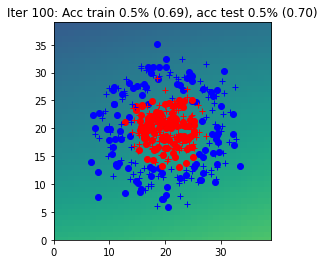

Iter 101: Acc train 0.5% (0.69), acc test 0.5% (0.70)


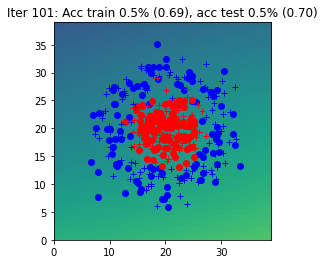

Iter 102: Acc train 0.5% (0.69), acc test 0.5% (0.70)


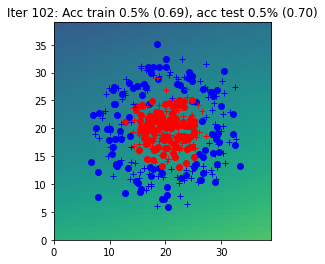

Iter 103: Acc train 0.5% (0.69), acc test 0.5% (0.70)


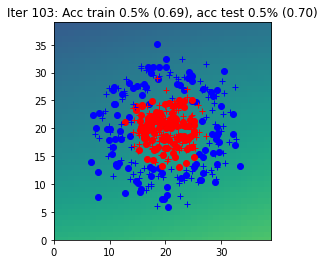

Iter 104: Acc train 0.5% (0.69), acc test 0.5% (0.70)


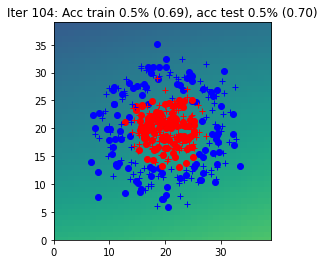

Iter 105: Acc train 0.5% (0.69), acc test 0.5% (0.70)


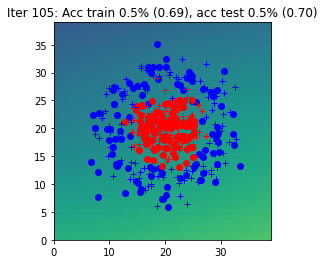

Iter 106: Acc train 0.5% (0.69), acc test 0.5% (0.70)


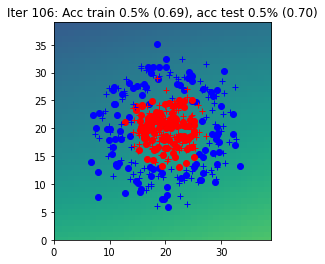

Iter 107: Acc train 0.5% (0.69), acc test 0.5% (0.70)


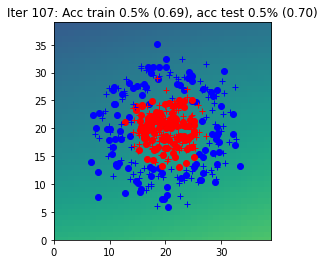

Iter 108: Acc train 0.5% (0.69), acc test 0.5% (0.70)


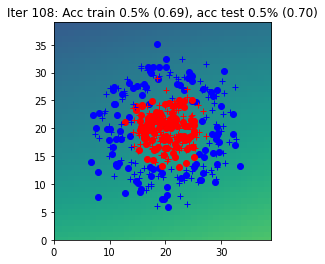

Iter 109: Acc train 0.5% (0.69), acc test 0.5% (0.70)


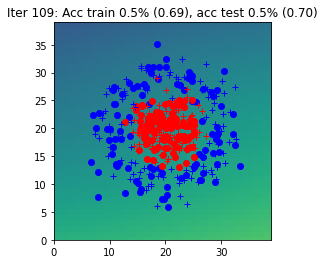

Iter 110: Acc train 0.5% (0.69), acc test 0.5% (0.70)


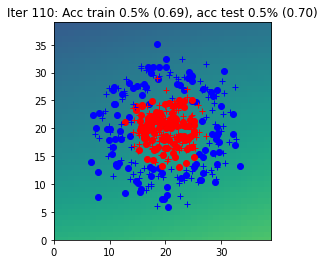

Iter 111: Acc train 0.5% (0.69), acc test 0.5% (0.70)


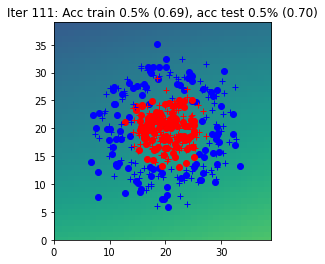

Iter 112: Acc train 0.5% (0.69), acc test 0.5% (0.70)


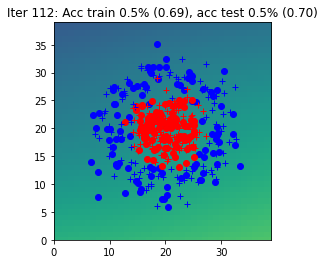

Iter 113: Acc train 0.5% (0.69), acc test 0.5% (0.70)


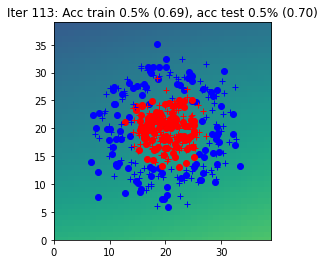

Iter 114: Acc train 0.5% (0.69), acc test 0.5% (0.70)


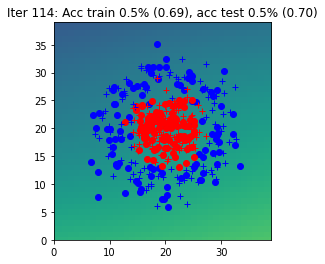

Iter 115: Acc train 0.5% (0.69), acc test 0.5% (0.70)


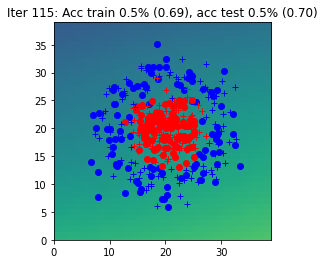

Iter 116: Acc train 0.5% (0.69), acc test 0.5% (0.70)


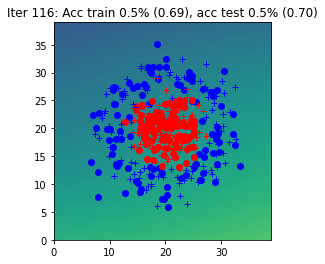

Iter 117: Acc train 0.5% (0.69), acc test 0.5% (0.70)


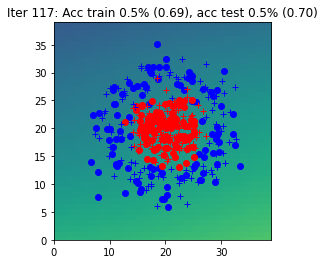

Iter 118: Acc train 0.5% (0.69), acc test 0.5% (0.70)


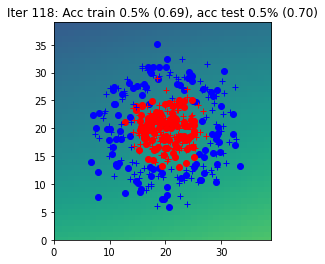

Iter 119: Acc train 0.5% (0.69), acc test 0.5% (0.70)


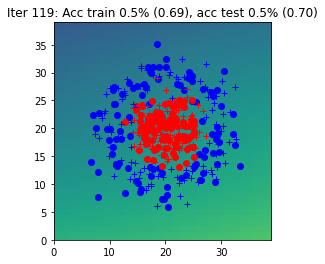

Iter 120: Acc train 0.5% (0.69), acc test 0.5% (0.70)


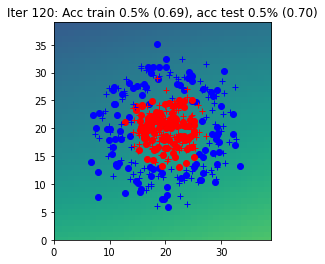

Iter 121: Acc train 0.5% (0.69), acc test 0.5% (0.70)


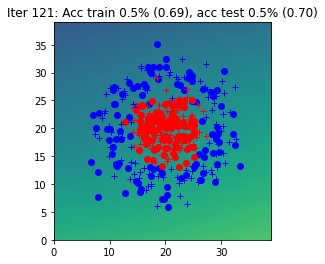

Iter 122: Acc train 0.5% (0.69), acc test 0.5% (0.70)


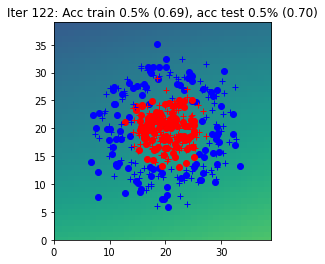

Iter 123: Acc train 0.5% (0.69), acc test 0.5% (0.70)


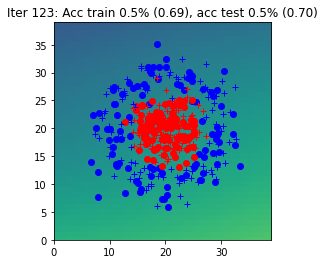

Iter 124: Acc train 0.5% (0.69), acc test 0.5% (0.70)


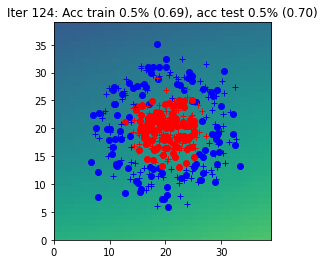

Iter 125: Acc train 0.5% (0.69), acc test 0.5% (0.70)


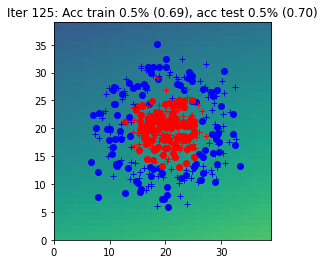

Iter 126: Acc train 0.5% (0.69), acc test 0.5% (0.70)


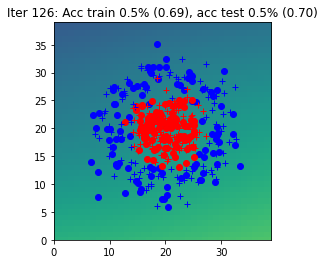

Iter 127: Acc train 0.5% (0.69), acc test 0.5% (0.70)


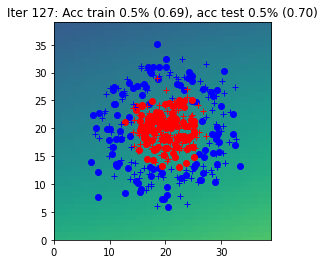

Iter 128: Acc train 0.5% (0.69), acc test 0.5% (0.70)


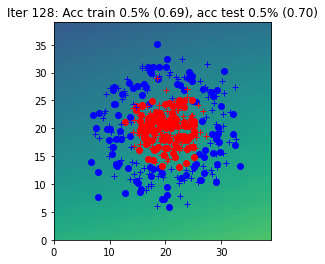

Iter 129: Acc train 0.5% (0.69), acc test 0.5% (0.70)


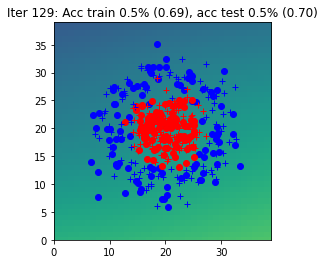

Iter 130: Acc train 0.5% (0.69), acc test 0.5% (0.70)


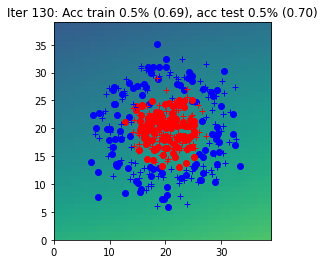

Iter 131: Acc train 0.5% (0.69), acc test 0.5% (0.70)


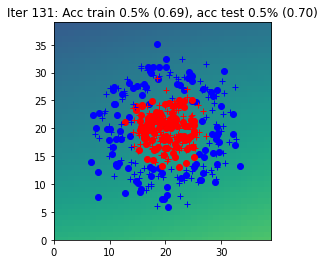

Iter 132: Acc train 0.5% (0.69), acc test 0.5% (0.70)


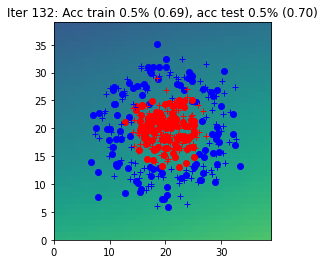

Iter 133: Acc train 0.5% (0.69), acc test 0.5% (0.70)


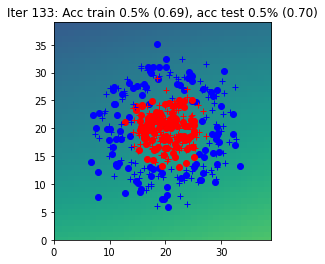

Iter 134: Acc train 0.5% (0.69), acc test 0.5% (0.70)


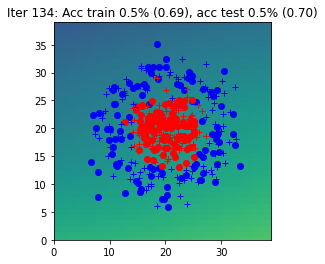

Iter 135: Acc train 0.5% (0.69), acc test 0.5% (0.70)


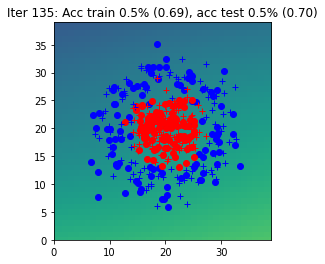

Iter 136: Acc train 0.5% (0.69), acc test 0.5% (0.70)


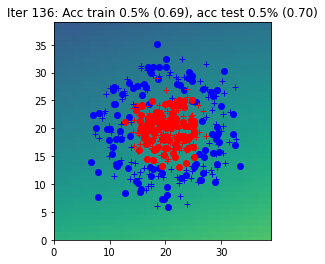

Iter 137: Acc train 0.5% (0.69), acc test 0.5% (0.70)


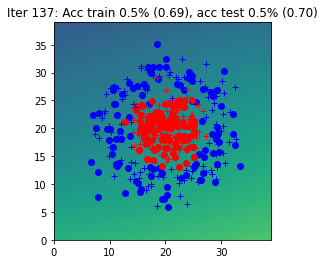

Iter 138: Acc train 0.5% (0.69), acc test 0.5% (0.70)


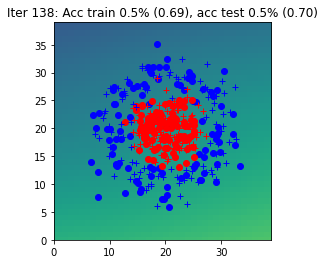

Iter 139: Acc train 0.5% (0.69), acc test 0.5% (0.70)


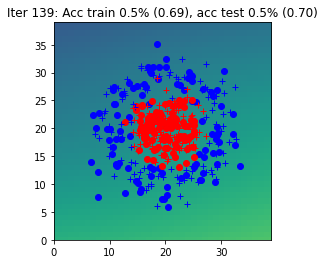

Iter 140: Acc train 0.5% (0.69), acc test 0.5% (0.70)


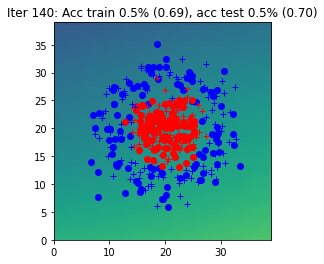

Iter 141: Acc train 0.5% (0.69), acc test 0.5% (0.70)


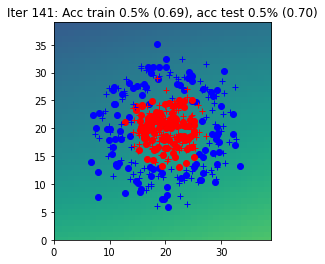

Iter 142: Acc train 0.5% (0.69), acc test 0.5% (0.70)


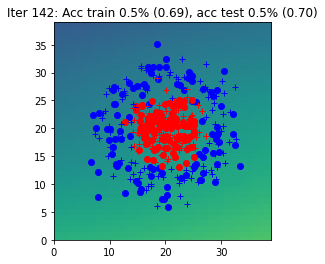

Iter 143: Acc train 0.5% (0.69), acc test 0.5% (0.70)


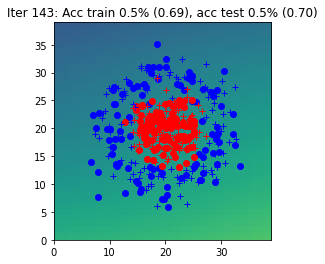

Iter 144: Acc train 0.5% (0.69), acc test 0.5% (0.70)


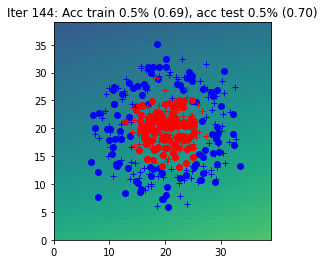

Iter 145: Acc train 0.5% (0.69), acc test 0.5% (0.70)


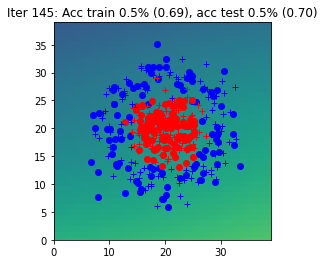

Iter 146: Acc train 0.5% (0.69), acc test 0.5% (0.70)


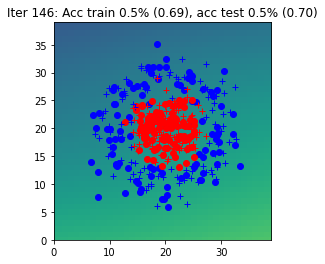

Iter 147: Acc train 0.5% (0.69), acc test 0.5% (0.70)


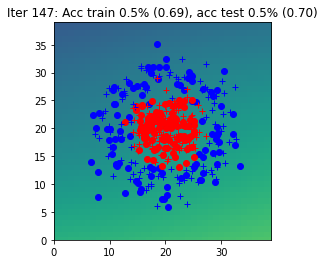

Iter 148: Acc train 0.5% (0.69), acc test 0.5% (0.70)


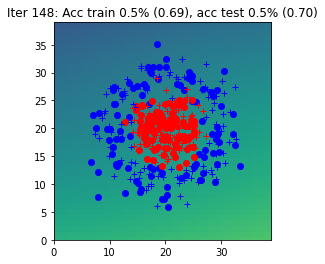

Iter 149: Acc train 0.5% (0.69), acc test 0.5% (0.70)


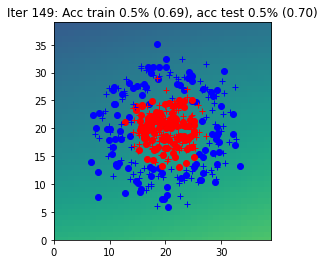

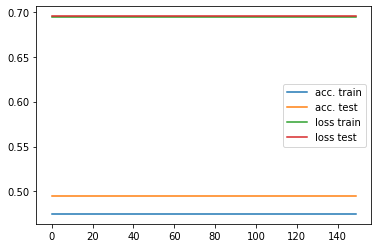

In [12]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [13]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = None
    loss = None

    ####################
    ##      END        #
    ####################

    return model, loss

In [14]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

    L = 0
    acc = 0

    ####################
    ##      END        #
    ####################

    return L, acc

In [15]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators


    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

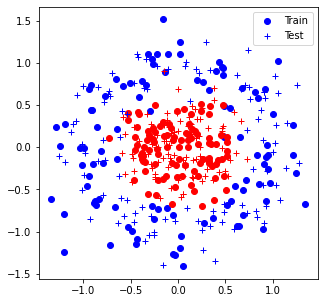

TypeError: ignored

In [16]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd

    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 4 : Simplification of the SGD with `torch.optim`

In [ ]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = None
    loss = None
    optim = None

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after. 

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [ ]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [ ]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas : 
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = None

###########################

In [ ]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)